<a href="https://colab.research.google.com/github/Vizzuality/copernicus-climate-data/blob/master/prepare_total_zonal_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare data for the copernicus-climate project

https://github.com/Vizzuality/copernicus-climate-data

`Edward P. Morris (vizzuality.)`

## Description
This notebook transforms time series arrays of climate data into zonal statistical summaries. 

```
MIT License

Copyright (c) 2020 Vizzuality

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```

# Setup

Instructions for setting up the computing environment.

In [0]:
# Time all processing
from datetime import datetime
start_time_setup = datetime.now()

In [0]:
%%bash
# Remove sample_data
rm -r sample_data

## Linux dependencies

Instructions for adding linux (including node, ect.) system packages. 

In [0]:
#!apt install -q -y [package-name]
#!npm install -g [package-name]

In [4]:
# Packages for projections and geospatial processing
!apt install -q -y libspatialindex-dev libproj-dev proj-data proj-bin libgeos-dev

Reading package lists...
Building dependency tree...
Reading state information...
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev libspatialindex-c4v5 libspatialindex-dev
  libspatialindex4v5 proj-bin
0 upgraded, 6 newly installed, 0 to remove and 31 not upgraded.
Need to get 860 kB of archives.
After this operation, 5,014 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4

## Python packages

Consider using package versions to ensure nothing changes.

`!pip install -q <package-name>`

In [0]:
# connect to Google cloud storage
!pip install -q gcsfs 

In [6]:
# geospatial tools
!pip install -q country-converter geopandas

     |████████████████████████████████| 51kB 2.0MB/s 
     |████████████████████████████████| 931kB 10.1MB/s 
     |████████████████████████████████| 10.9MB 53.3MB/s 
     |████████████████████████████████| 14.7MB 312kB/s 


In [7]:
# xarray and Zarr tools
!pip install -q cftime netcdf4 nc-time-axis zarr xarray xclim rioxarray regionmask sparse xarray-extras

     |████████████████████████████████| 327kB 3.4MB/s 
     |████████████████████████████████| 4.1MB 60.8MB/s 
     |████████████████████████████████| 3.3MB 38.5MB/s 
     |████████████████████████████████| 143kB 58.2MB/s 
     |████████████████████████████████| 3.7MB 59.2MB/s 
     |████████████████████████████████| 122kB 58.3MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 3.8MB 45.3MB/s 
     |████████████████████████████████| 174kB 61.9MB/s 
     |████████████████████████████████| 194kB 63.2MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 18.2MB 237kB/s 
     |████████████████████████████████| 14.4MB 26.4MB/s 
     |████████████████████████████████| 634kB 46.5MB/s 
     |████████████████████████████████| 225kB 53.8MB/s 
     |████████████████████████████████| 102kB 12.0MB/s 
ERROR: distributed 2.16.0 has requirement tornado>=5; python_version < "3.8", but you'll have tornado 4.5.3 

In [8]:
# Show python package versions
!pip list

Package                  Version        
------------------------ ---------------
absl-py                  0.9.0          
affine                   2.3.0          
alabaster                0.7.12         
albumentations           0.1.12         
altair                   4.1.0          
asciitree                0.3.3          
asgiref                  3.2.7          
astor                    0.8.1          
astropy                  4.0.1.post1    
astunparse               1.6.3          
atari-py                 0.2.6          
atomicwrites             1.4.0          
attrs                    19.3.0         
audioread                2.1.8          
autograd                 1.3            
Babel                    2.8.0          
backcall                 0.1.0          
beautifulsoup4           4.6.3          
bleach                   3.1.5          
blis                     0.4.1          
bokeh                    1.4.0          
boltons                  20.1.0         
boto            

## Authorisation

Setting up connections and authorisation to cloud services.

### Google Cloud

This can be done in the URL or via adding service account credentials.

If you do not share the notebook, you can mount your Drive and and transfer credentials to disk. Note if the notebook is shared you always need to authenticate via URL.  

In [0]:
# Set Google Cloud information
gc_project = "skydipper-196010"
gc_creds = "skydipper-196010-f842645fd0f3.json"
gc_user = "edward-morris@skydipper-196010.iam.gserviceaccount.com"
gcs_prefix = "gs://copernicus-climate"

In [0]:
# For auth WITHOUT service account
# https://cloud.google.com/resource-manager/docs/creating-managing-projects
#from google.colab import auth
#auth.authenticate_user()
#!gcloud config set project {project_id}

In [0]:
# If the notebook is shared
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
# If Drive is mounted, copy GC credentials to home (place in your GDrive, and connect Drive)
!cp "/content/drive/My Drive/{gc_creds}" "/root/.{gc_creds}"

In [13]:
# Auth WITH service account
!gcloud auth activate-service-account {gc_user} --key-file=/root/.{gc_creds} --project={gc_project}

Activated service account credentials for: [edward-morris@skydipper-196010.iam.gserviceaccount.com]


In [14]:
# Test GC auth
!gsutil ls {gcs_prefix}

gs://copernicus-climate/heatwaves_historical_Basque.zip
gs://copernicus-climate/heatwaves_longterm_Basque.zip
gs://copernicus-climate/spain.zarr.zip
gs://copernicus-climate/coldsnaps/
gs://copernicus-climate/data_for_PET/
gs://copernicus-climate/dataset/
gs://copernicus-climate/european-nuts-lau-geometries.zarr/
gs://copernicus-climate/heatwaves/
gs://copernicus-climate/pet/
gs://copernicus-climate/spain-zonal-stats.zarr/
gs://copernicus-climate/spain.zarr/
gs://copernicus-climate/spain.zonal-stats.zarr/
gs://copernicus-climate/tasmax/
gs://copernicus-climate/tasmin/
gs://copernicus-climate/to_delete/
gs://copernicus-climate/zonal_stats/


# Utils

Generic helper functions used in the subsequent processing. For easy navigation each function seperated into a section with the function name.

## mkdirs

In [0]:
from pathlib import Path

def mkdirs(dirs_list, exist_ok=True):
  """ Create nested directories
  """
  for p in dirs_list:
    Path(p).mkdir(parents=True, exist_ok=exist_ok)


## copy_gcs

In [0]:
import os
import subprocess

def copy_gcs(source_list, dest_list, opts=""):
  """
  Use gsutil to copy each corresponding item in source_list
  to dest_list.

  Example:
  copy_gcs(["gs://my-bucket/data-file.csv"], ["."])

  """
  for s, d  in zip(source_list, dest_list):
    cmd = f"gsutil -m cp -r {opts} {s} {d}"
    print(f"Processing: {cmd}")
    r = subprocess.call(cmd, shell=True)
    if r == 0:
        print("Task created")
    else:
        print("Task failed")
  print("Finished copy")

## set_acl_to_public

In [0]:
import subprocess

# Set to asset permissions to public for https read
def set_acl_to_public(gs_path):
  """ 
  Set all Google Storage assets to puplic read access.

  Requires GS authentication

  Parameters
  ----------
  gs_path str
    The google storage path, note the "-r" option is used, setting the acl of all assets below this path
  """
  cmd = f"gsutil -m acl -r ch -u AllUsers:R {gs_path}"
  print(cmd)
  r = subprocess.call(cmd, shell=True)
  if r is 0:
    print("Set acl(s) sucsessful")
  else:
    print("Set acl(s) failed")  

#set_acl_to_public("gs://skydipper-water-quality/cloud-masks")

## get_cached_remote_zarr

In [0]:
import gcsfs
import zarr
import xarray as xr



def get_cached_remote_zarr(
    group,
    root,
    project_id = gc_project,
    token=f"/root/.{gc_creds}"
    ):
  
  # Connect to GS
  gc = gcsfs.GCSFileSystem(project=project_id, token=token)
  store = gc.get_mapper(root, check=False, create=True)
  # Check zarr is consolidated
  consolidated = gc.exists(f'{root}/.zmetadata')
  # Cache the zarr store
  #store = zarr.ZipStore(store, mode='r')
  cache = zarr.LRUStoreCache(store, max_size=None)
  # Return cached zarr group
  return xr.open_zarr(cache, group=group, consolidated=consolidated)

## get_gda_geoms

In [0]:
import geopandas as gpd
import shapely

def get_gda_geoms(group, root, select_by=None):
  gda = get_cached_remote_zarr(group, root = root)
  # Select
  if select_by:
    gda = gda.sel(select_by, drop=True)
  df = gda.reset_coords().to_dataframe().dropna().reset_index()
  geoms = df.geometry
  # Return as geopandas object, converting geometry to shapley objects
  return gpd.GeoDataFrame(df, geometry=[shapely.wkb.loads(g, True) for g in geoms])


## join_geometries

In [0]:
def join_geometries(ds, dvars, id_prop, print_df=False):
  """
  Join zonal statistic summaries per `id_prop` to geometries and return
  Geopandas dataframe.

  - Note dataset should not have time access! 
   """
  # Get geo-array
  gda = get_cached_remote_zarr(group = 'nuts-2016-lau-2018', root = "copernicus-climate/european-nuts-lau-geometries.zarr")
  # Select dataset variables
  dss = ds[dvars].sortby('gid')
  # Filter gda
  gda_sel = gda.where(gda.gid.isin(dss.gid), drop=True).sortby('gid')
  # Convert to dataframe
  df = xr.merge([dss, gda_sel]).reset_coords().to_dataframe().dropna().reset_index()
  
  if print_df is True:
    print("\nZonal statistics results\n")
    print(df[['gid', 'geoname'] + dvars])

  # Return as geopandas object, converting geometry to shapley objects
  geoms = [shapely.wkb.loads(g, hex=True) for g in df.geometry.values]
  return gpd.GeoDataFrame(df, geometry = geoms)

## to_geopandas

In [0]:
def to_geopandas(ds):
  df = ds.reset_coords().to_dataframe().dropna().reset_index()
  # Return as geopandas object, converting geometry to shapley objects
  geoms = [shapely.wkb.loads(g, hex=True) for g in df.geometry.values]
  return gpd.GeoDataFrame(df, geometry = geoms)

## plot_multi_geopandas

In [0]:
import matplotlib.pyplot as plt
import warnings

def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

def plot_multi_geopandas(gdf, columns, fig_title = None, sel=None, cols=4, figsize=(10,10)):
  rows = len(columns) // cols + 1
  fig, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True, squeeze=True)
  fig.suptitle(fig_title, fontsize=16)
  axs = trim_axs(axs, len(columns))
  if not sel.empty:
    gdf = gdf.loc[sel]
  for ax, column in zip(axs, columns):
    missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"}
    legend_kwds={'label': column, 'orientation': "horizontal"}
    gdf.plot(ax = ax, column=column, legend=True, missing_kwds=missing_kwds, legend_kwds=legend_kwds)
    ax.set_title(column)
  plt.show()  

## write_to_remote_zarr

In [0]:
import gcsfs
import zarr
import xarray as xr

def write_to_remote_zarr(
    ds,
    group,
    root,
    mode = 'w',
    append_dim = None,    
    encoding = None,
    unchunk_coords = True,
    project_id = gc_project,
    token=f"/root/.{gc_creds}",
    show_tree = True
    ):
  print("Starting to write to Zarr...\n")
  # Connect to GS
  gc = gcsfs.GCSFileSystem(project=project_id, token=token)
  store = gc.get_mapper(root, check=False, create=True)
  print("GCS store is setup\n")
  # consolidate metadata at root
  #zarr.consolidate_metadata(store)
  #print("Consolidated metadata\n")
  # Write to zarr group
  print("Writing to store...\n")
  if append_dim is not None:
    mode = 'a'
  ds.to_zarr(store=store, group=group, mode=mode, consolidated=True, encoding=encoding, append_dim = append_dim)
  print("Finished writing\n")
  # consolidate metadata at root
  #zarr.consolidate_metadata(store)
  #print("Consolidated metadata\n")
  c = gc.exists(f"{root}/.zmetadata")
  print(f"{root} is consoldiated? {c}\n")
  # unchunk coordinates
  # TODO: optimise this for remote ZARR
  #if unchunk_coords:
  #  unchunk_dataset(store, coords_only = True)
  if show_tree:
    with zarr.open_consolidated(store, mode='r') as z:
      print(z.tree())




## rmv_remote_zarr

In [0]:
import gcsfs
import zarr

def rmv_remote_zarr(
    group,
    root,
    project_id = gc_project,
    token=f"/root/.{gc_creds}",
     show_tree=False):
  
  # Connect to GS
  gc = gcsfs.GCSFileSystem(project=project_id, token=token)
  store = gc.get_mapper(root, check=False, create=True)
  # Remove zarr group
  print(f"Removing {root}/{group}")
  zarr.storage.rmdir(store, path=group)
  # consolidate metadata at root
  zarr.consolidate_metadata(store)
  if show_tree:
    with zarr.open_consolidated(store, mode='r') as z:
      print(z.tree())

# Processing

Data processing organised into sections.

In [0]:
# Time all processing
from datetime import datetime
start_time_processing = datetime.now()

## Get datasets and view time-series

In [26]:
%%time
# Geometries
gda = get_cached_remote_zarr(group = 'nuts-2016-lau-2018', root = "copernicus-climate/european-nuts-lau-geometries.zarr")
print(gda)

<xarray.Dataset>
Dimensions:      (gid: 104568)
Coordinates:
    admin_level  (gid) int64 dask.array<chunksize=(104568,), meta=np.ndarray>
    geoname      (gid) object dask.array<chunksize=(26142,), meta=np.ndarray>
  * gid          (gid) object 'AL' 'CZ' 'DE' ... 'UK_W06000023' 'UK_W06000024'
    iso3         (gid) object dask.array<chunksize=(26142,), meta=np.ndarray>
Data variables:
    geometry     (gid) object dask.array<chunksize=(26142,), meta=np.ndarray>
Attributes:
    crs:                 EPSG:4326
    geospatial_lat_max:  75.814181
    geospatial_lat_min:  26.018616
    geospatial_lon_max:  69.103165
    geospatial_lon_min:  61.78629
    history:             Created by combining `ref-nuts-2016-01m` and `LAU-20...
    keywords:            Statistical units, NUTS, LAU
    summary:             This dataset represents the regions for levels 1, 2 ...
    title:               European Union Nomenclature of Territorial Units for...
CPU times: user 95 ms, sys: 13.1 ms, total: 108 m

In [27]:
his_ss_2 = get_cached_remote_zarr(group='historical-monthly-zs-nuts-level-2', root = "copernicus-climate/spain-zonal-stats.zarr")
his_ss_2 = xr.merge([his_ss_2, gda.where(gda.gid.isin(his_ss_2.gid), drop=True)])
print(his_ss_2.geoname.sortby('geoname').values.tolist())
his_ss_2

['Andalucía', 'Aragón', 'Cantabria', 'Castilla Y León', 'Castilla-La Mancha', 'Cataluña', 'Ciudad Autónoma De Ceuta', 'Ciudad Autónoma De Melilla', 'Comunidad De Madrid', 'Comunidad Foral De Navarra', 'Comunidad Valenciana', 'Extremadura', 'Galicia', 'Illes Balears', 'La Rioja', 'País Vasco', 'Principado De Asturias', 'Región De Murcia']


<xarray.Dataset>
Dimensions:                   (gid: 18, time: 468)
Coordinates:
  * gid                       (gid) <U4 'ES53' 'ES12' 'ES24' ... 'ES63' 'ES64'
  * time                      (time) datetime64[ns] 1981-01-01 ... 2019-12-01
    admin_level               (gid) int64 dask.array<chunksize=(18,), meta=np.ndarray>
    geoname                   (gid) object dask.array<chunksize=(18,), meta=np.ndarray>
    iso3                      (gid) object dask.array<chunksize=(18,), meta=np.ndarray>
Data variables:
    coldsnap_alarms_mean      (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    coldsnap_alerts_mean      (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    coldsnap_warnings_mean    (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    coldstress_extreme_mean   (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    coldstress_moderate_mean  (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    coldstress_strong_mean    (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    heatstress_extreme_mean   (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    heatstress_moderate_mean  (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    heatstress_strong_mean    (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    heatwave_alarms_mean      (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    heatwave_alerts_mean      (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    heatwave_warnings_mean    (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    petmax_mean               (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    petmin_mean               (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    tasmax_mean               (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    tasmin_mean               (gid, time) float32 dask.array<chunksize=(18, 468), meta=np.ndarray>
    geometry                  (gid) object dask.array<chunksize=(18,), meta=np.ndarray>

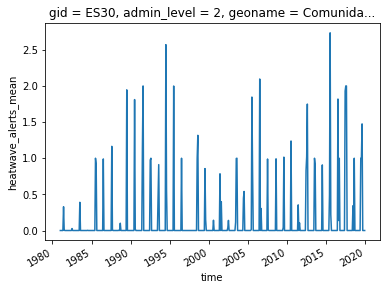

In [28]:
his_ss_2.heatwave_alerts_mean.where(his_ss_2.geoname=='Comunidad De Madrid', drop=True).plot()

In [29]:
his_ss_3 = get_cached_remote_zarr(group='historical-monthly-zs-nuts-level-3', root = "copernicus-climate/spain-zonal-stats.zarr")
his_ss_3 = xr.merge([his_ss_3, gda.where(gda.gid.isin(his_ss_3.gid), drop=True)])
print(his_ss_3.geoname.sortby('geoname').values.tolist())
his_ss_3

['A Coruña', 'Albacete', 'Alicante / Alacant', 'Almería', 'Araba/Álava', 'Asturias', 'Badajoz', 'Barcelona', 'Bizkaia', 'Burgos', 'Cantabria', 'Castellón / Castelló', 'Ceuta', 'Ciudad Real', 'Cuenca', 'Cáceres', 'Cádiz', 'Córdoba', 'Eivissa Y Formentera', 'Gipuzkoa', 'Girona', 'Granada', 'Guadalajara', 'Huelva', 'Huesca', 'Jaén', 'La Rioja', 'León', 'Lleida', 'Lugo', 'Madrid', 'Mallorca', 'Melilla', 'Menorca', 'Murcia', 'Málaga', 'Navarra', 'Ourense', 'Palencia', 'Pontevedra', 'Salamanca', 'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia / València', 'Valladolid', 'Zamora', 'Zaragoza', 'Ávila']


<xarray.Dataset>
Dimensions:                   (gid: 52, time: 468)
Coordinates:
  * gid                       (gid) <U5 'ES432' 'ES511' ... 'ES640' 'ES411'
  * time                      (time) datetime64[ns] 1981-01-01 ... 2019-12-01
    admin_level               (gid) int64 dask.array<chunksize=(52,), meta=np.ndarray>
    geoname                   (gid) object dask.array<chunksize=(52,), meta=np.ndarray>
    iso3                      (gid) object dask.array<chunksize=(52,), meta=np.ndarray>
Data variables:
    coldsnap_alarms_mean      (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    coldsnap_alerts_mean      (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    coldsnap_warnings_mean    (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    coldstress_extreme_mean   (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    coldstress_moderate_mean  (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    coldstress_strong_mean    (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    heatstress_extreme_mean   (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    heatstress_moderate_mean  (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    heatstress_strong_mean    (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    heatwave_alarms_mean      (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    heatwave_alerts_mean      (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    heatwave_warnings_mean    (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    petmax_mean               (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    petmin_mean               (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    tasmax_mean               (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    tasmin_mean               (gid, time) float32 dask.array<chunksize=(52, 468), meta=np.ndarray>
    geometry                  (gid) object dask.array<chunksize=(52,), meta=np.ndarray>

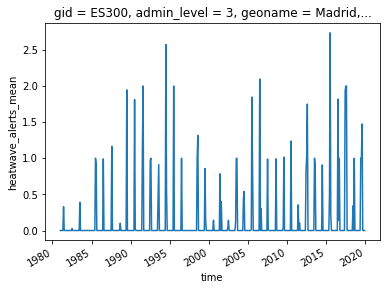

In [30]:
his_ss_3.heatwave_alerts_mean.where(his_ss_3.geoname=='Madrid', drop=True).plot()

In [31]:
his_ss_4 = get_cached_remote_zarr(group='historical-monthly-zs-nuts-level-4', root = "copernicus-climate/spain-zonal-stats.zarr")
his_ss_4 = xr.merge([his_ss_4, gda.where(gda.gid.isin(his_ss_4.gid), drop=True)])
print(his_ss_4.geoname.sortby('geoname').values.tolist())
his_ss_4

/usr/local/lib/python3.6/dist-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 1574 times more chunks
  return self.array[key]
/usr/local/lib/python3.6/dist-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 1574 times more chunks
  return self.array[key]
/usr/local/lib/python3.6/dist-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 1574 times more chunks
  return self.array[key]


['Ababuj', 'Abades', 'Abadiño', 'Abadía', 'Abadín', 'Abajas', 'Abaltzisketa', 'Abanilla', 'Abanto', 'Abanto Y Ciérvana-Abanto Zierbena', 'Abarca De Campos', 'Abarán', 'Abaurregaina / Abaurrea Alta', 'Abaurrepea / Abaurrea Baja', 'Abegondo', 'Abejar', 'Abejuela', 'Abella De La Conca', 'Abengibre', 'Abenójar', 'Aberin', 'Abertura', 'Abezames', 'Abia De La Obispalía', 'Abia De Las Torres', 'Abiego', 'Abizanda', 'Abla', 'Ablanque', 'Ablitas', 'Abrera', 'Abrucena', 'Abusejo', 'Abáigar', 'Abánades', 'Abárzuza / Abartzuza', 'Acebeda, La', 'Acebedo', 'Acebo', 'Acebrón, El', 'Acedera', 'Acehúche', 'Aceituna', 'Acered', 'Aceuchal', 'Adahuesca', 'Adalia', 'Adamuz', 'Adanero', 'Ademuz', 'Adiós', 'Adobes', 'Ador', 'Adra', 'Adrada De Haza', 'Adrada De Pirón', 'Adrada, La', 'Adradas', 'Adrados', 'Aduna', 'Agallas', 'Agolada', 'Agoncillo', 'Agost', 'Agramunt', 'Agres', 'Agrón', 'Aguadulce', 'Aguarón', 'Aguas Cándidas', 'Aguasal', 'Aguatón', 'Aguaviva', 'Agudo', 'Aguilafuente', 'Aguilar De Bureba', 'Ag

<xarray.Dataset>
Dimensions:                   (gid: 8017, time: 468)
Coordinates:
  * gid                       (gid) <U8 'ES_01001' 'ES_01002' ... 'ES_52001'
  * time                      (time) datetime64[ns] 1981-01-01 ... 2019-12-01
    admin_level               (gid) int64 dask.array<chunksize=(8017,), meta=np.ndarray>
    geoname                   (gid) object dask.array<chunksize=(1526,), meta=np.ndarray>
    iso3                      (gid) object dask.array<chunksize=(1526,), meta=np.ndarray>
Data variables:
    coldsnap_alarms_mean      (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    coldsnap_alerts_mean      (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    coldsnap_warnings_mean    (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    coldstress_extreme_mean   (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    coldstress_moderate_mean  (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    coldstress_strong_mean    (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    heatstress_extreme_mean   (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    heatstress_moderate_mean  (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    heatstress_strong_mean    (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    heatwave_alarms_mean      (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    heatwave_alerts_mean      (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    heatwave_warnings_mean    (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    petmax_mean               (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    petmin_mean               (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    tasmax_mean               (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    tasmin_mean               (gid, time) float32 dask.array<chunksize=(100, 468), meta=np.ndarray>
    geometry                  (gid) object dask.array<chunksize=(1526,), meta=np.ndarray>

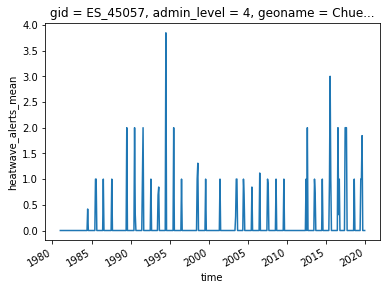

In [32]:
his_ss_4.heatwave_alerts_mean.where(his_ss_4.geoname=='Chueca', drop=True).plot()

In [37]:
import numpy as np
seas_ss_2 = get_cached_remote_zarr(group='future-seasonal-monthly-zs-nuts-level-2', root = "copernicus-climate/spain-zonal-stats.zarr")
#seas_ss_2 = xr.merge([seas_ss_2, gda.where(gda.gid.isin(np.unique(seas_ss_2.gid.values)), drop=True)])
#print(seas_ss_2.geoname.sortby('geoname').values.tolist())
seas_ss_2

<xarray.Dataset>
Dimensions:                 (gid: 18, time: 6)
Coordinates:
  * gid                     (gid) <U4 '' '' '' '' '' '' '' ... '' '' '' '' '' ''
  * time                    (time) datetime64[ns] 2020-02-01 ... 2020-07-01
Data variables:
    coldsnap_alarms_mean    (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    coldsnap_alarms_std     (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    coldsnap_alerts_mean    (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    coldsnap_alerts_std     (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    coldsnap_warnings_mean  (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    coldsnap_warnings_std   (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    heatwave_alarms_mean    (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    heatwave_alarms_std     (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    heatwave_alerts_mean    (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    heatwave_alerts_std     (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    heatwave_warnings_mean  (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    heatwave_warnings_std   (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    tasmax_mean             (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    tasmax_std              (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    tasmin_mean             (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>
    tasmin_std              (gid, time) float32 dask.array<chunksize=(18, 6), meta=np.ndarray>

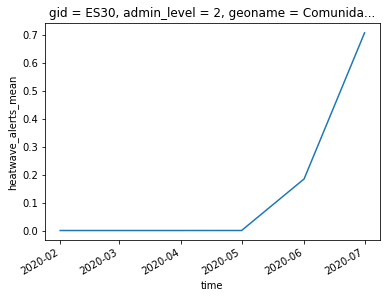

In [0]:
seas_ss_2.heatwave_alerts_mean.where(seas_ss_2.geoname=='Comunidad De Madrid', drop=True).plot()

In [39]:
seas_ss_3 = get_cached_remote_zarr(group='future-seasonal-monthly-zs-nuts-level-3', root = "copernicus-climate/spain-zonal-stats.zarr")
seas_ss_3 = xr.merge([seas_ss_3, gda.where(gda.gid.isin(seas_ss_3.gid), drop=True)])
print(seas_ss_3.geoname.sortby('geoname').values.tolist())
seas_ss_3

['A Coruña', 'Albacete', 'Alicante / Alacant', 'Almería', 'Araba/Álava', 'Asturias', 'Badajoz', 'Barcelona', 'Bizkaia', 'Burgos', 'Cantabria', 'Castellón / Castelló', 'Ceuta', 'Ciudad Real', 'Cuenca', 'Cáceres', 'Cádiz', 'Córdoba', 'Eivissa Y Formentera', 'Gipuzkoa', 'Girona', 'Granada', 'Guadalajara', 'Huelva', 'Huesca', 'Jaén', 'La Rioja', 'León', 'Lleida', 'Lugo', 'Madrid', 'Mallorca', 'Melilla', 'Menorca', 'Murcia', 'Málaga', 'Navarra', 'Ourense', 'Palencia', 'Pontevedra', 'Salamanca', 'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia / València', 'Valladolid', 'Zamora', 'Zaragoza', 'Ávila']


<xarray.Dataset>
Dimensions:                 (gid: 52, time: 6)
Coordinates:
  * gid                     (gid) object 'ES111' 'ES112' ... 'ES630' 'ES640'
  * time                    (time) datetime64[ns] 2020-02-01 ... 2020-07-01
    admin_level             (gid) int64 dask.array<chunksize=(52,), meta=np.ndarray>
    geoname                 (gid) object dask.array<chunksize=(52,), meta=np.ndarray>
    iso3                    (gid) object dask.array<chunksize=(52,), meta=np.ndarray>
Data variables:
    coldsnap_alarms_mean    (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    coldsnap_alarms_std     (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    coldsnap_alerts_mean    (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    coldsnap_alerts_std     (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    coldsnap_warnings_mean  (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    coldsnap_warnings_std   (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    heatwave_alarms_mean    (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    heatwave_alarms_std     (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    heatwave_alerts_mean    (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    heatwave_alerts_std     (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    heatwave_warnings_mean  (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    heatwave_warnings_std   (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    tasmax_mean             (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    tasmax_std              (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    tasmin_mean             (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    tasmin_std              (gid, time) float32 dask.array<chunksize=(52, 6), meta=np.ndarray>
    geometry                (gid) object dask.array<chunksize=(52,), meta=np.ndarray>

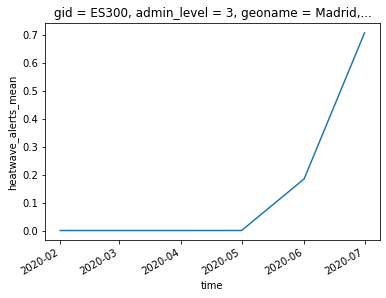

In [40]:
seas_ss_3.heatwave_alerts_mean.where(seas_ss_3.geoname=='Madrid', drop=True).plot()

In [41]:
seas_ss_4 = get_cached_remote_zarr(group='future-seasonal-monthly-zs-nuts-level-4', root = "copernicus-climate/spain-zonal-stats.zarr")
seas_ss_4 = xr.merge([seas_ss_4, gda.where(gda.gid.isin(seas_ss_4.gid), drop=True)])
print(seas_ss_4.geoname.sortby('geoname').values.tolist())
seas_ss_4

/usr/local/lib/python3.6/dist-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 1574 times more chunks
  return self.array[key]
/usr/local/lib/python3.6/dist-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 1574 times more chunks
  return self.array[key]
/usr/local/lib/python3.6/dist-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 1574 times more chunks
  return self.array[key]


['Ababuj', 'Abades', 'Abadiño', 'Abadía', 'Abadín', 'Abajas', 'Abaltzisketa', 'Abanilla', 'Abanto', 'Abanto Y Ciérvana-Abanto Zierbena', 'Abarca De Campos', 'Abarán', 'Abaurregaina / Abaurrea Alta', 'Abaurrepea / Abaurrea Baja', 'Abegondo', 'Abejar', 'Abejuela', 'Abella De La Conca', 'Abengibre', 'Abenójar', 'Aberin', 'Abertura', 'Abezames', 'Abia De La Obispalía', 'Abia De Las Torres', 'Abiego', 'Abizanda', 'Abla', 'Ablanque', 'Ablitas', 'Abrera', 'Abrucena', 'Abusejo', 'Abáigar', 'Abánades', 'Abárzuza / Abartzuza', 'Acebeda, La', 'Acebedo', 'Acebo', 'Acebrón, El', 'Acedera', 'Acehúche', 'Aceituna', 'Acered', 'Aceuchal', 'Adahuesca', 'Adalia', 'Adamuz', 'Adanero', 'Ademuz', 'Adiós', 'Adobes', 'Ador', 'Adra', 'Adrada De Haza', 'Adrada De Pirón', 'Adrada, La', 'Adradas', 'Adrados', 'Aduna', 'Agallas', 'Agolada', 'Agoncillo', 'Agost', 'Agramunt', 'Agres', 'Agrón', 'Aguadulce', 'Aguarón', 'Aguas Cándidas', 'Aguasal', 'Aguatón', 'Aguaviva', 'Agudo', 'Aguilafuente', 'Aguilar De Bureba', 'Ag

<xarray.Dataset>
Dimensions:                 (gid: 8017, time: 6)
Coordinates:
  * gid                     (gid) <U8 'ES_01001' 'ES_01002' ... 'ES_52001'
  * time                    (time) datetime64[ns] 2020-02-01 ... 2020-07-01
    admin_level             (gid) int64 dask.array<chunksize=(8017,), meta=np.ndarray>
    geoname                 (gid) object dask.array<chunksize=(1526,), meta=np.ndarray>
    iso3                    (gid) object dask.array<chunksize=(1526,), meta=np.ndarray>
Data variables:
    coldsnap_alarms_mean    (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    coldsnap_alarms_std     (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    coldsnap_alerts_mean    (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    coldsnap_alerts_std     (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    coldsnap_warnings_mean  (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    coldsnap_warnings_std   (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    heatwave_alarms_mean    (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    heatwave_alarms_std     (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    heatwave_alerts_mean    (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    heatwave_alerts_std     (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    heatwave_warnings_mean  (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    heatwave_warnings_std   (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    tasmax_mean             (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    tasmax_std              (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    tasmin_mean             (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    tasmin_std              (gid, time) float32 dask.array<chunksize=(100, 6), meta=np.ndarray>
    geometry                (gid) object dask.array<chunksize=(1526,), meta=np.ndarray>

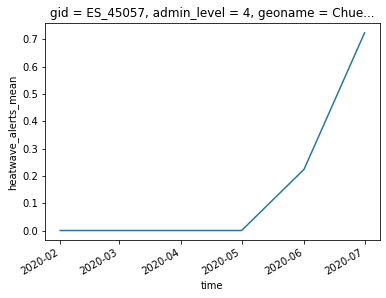

In [42]:
seas_ss_4.heatwave_alerts_mean.where(seas_ss_4.geoname=='Chueca', drop=True).plot()

In [0]:
fut_ss_2 = get_cached_remote_zarr(group='future-longterm-monthly-zs-nuts-level-2', root = "copernicus-climate/spain-zonal-stats.zarr")
fut_ss_2 = xr.merge([fut_ss_2, gda.where(gda.gid.isin(fut_ss_2.gid), drop=True)])
print(fut_ss_2.geoname.sortby('geoname').values.tolist())
fut_ss_2

['Andalucía', 'Aragón', 'Cantabria', 'Castilla Y León', 'Castilla-La Mancha', 'Cataluña', 'Comunidad De Madrid', 'Comunidad Foral De Navarra', 'Comunidad Valenciana', 'Extremadura', 'Galicia', 'Illes Balears', 'La Rioja', 'País Vasco', 'Principado De Asturias', 'Región De Murcia']


<xarray.Dataset>
Dimensions:                 (experiment: 2, gid: 16, time: 8)
Coordinates:
  * gid                     (gid) object 'ES11' 'ES12' 'ES13' ... 'ES61' 'ES62'
  * experiment              (experiment) <U5 'rcp45' 'rcp85'
  * time                    (time) datetime64[ns] 2020-01-01 ... 2090-01-01
    admin_level             (gid) int64 dask.array<chunksize=(16,), meta=np.ndarray>
    geoname                 (gid) object dask.array<chunksize=(16,), meta=np.ndarray>
    iso3                    (gid) object dask.array<chunksize=(16,), meta=np.ndarray>
Data variables:
    coldsnap_alarms_mean    (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    coldsnap_alarms_std     (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    coldsnap_alerts_mean    (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    coldsnap_alerts_std     (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    coldsnap_warnings_mean  (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    coldsnap_warnings_std   (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    heatwave_alarms_mean    (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    heatwave_alarms_std     (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    heatwave_alerts_mean    (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    heatwave_alerts_std     (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    heatwave_warnings_mean  (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    heatwave_warnings_std   (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    tasmax_mean             (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    tasmax_std              (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    tasmin_mean             (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    tasmin_std              (experiment, gid, time) float32 dask.array<chunksize=(1, 16, 8), meta=np.ndarray>
    geometry                (gid) object dask.array<chunksize=(16,), meta=np.ndarray>

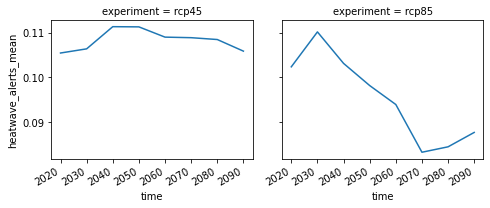

In [0]:
fut_ss_2.heatwave_alerts_mean.where(fut_ss_2.geoname=='Comunidad De Madrid', drop=True).plot(col='experiment')

In [0]:
fut_ss_3 = get_cached_remote_zarr(group='future-longterm-monthly-zs-nuts-level-3', root = "copernicus-climate/spain-zonal-stats.zarr")
fut_ss_3 = xr.merge([fut_ss_3, gda.where(gda.gid.isin(fut_ss_3.gid), drop=True)])
print(fut_ss_3.geoname.sortby('geoname').values.tolist())
fut_ss_3

['A Coruña', 'Albacete', 'Alicante / Alacant', 'Almería', 'Araba/Álava', 'Asturias', 'Badajoz', 'Barcelona', 'Bizkaia', 'Burgos', 'Cantabria', 'Castellón / Castelló', 'Ciudad Real', 'Cuenca', 'Cáceres', 'Cádiz', 'Córdoba', 'Eivissa Y Formentera', 'Gipuzkoa', 'Girona', 'Granada', 'Guadalajara', 'Huelva', 'Huesca', 'Jaén', 'La Rioja', 'León', 'Lleida', 'Lugo', 'Madrid', 'Mallorca', 'Menorca', 'Murcia', 'Málaga', 'Navarra', 'Ourense', 'Palencia', 'Pontevedra', 'Salamanca', 'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia / València', 'Valladolid', 'Zamora', 'Zaragoza', 'Ávila']


<xarray.Dataset>
Dimensions:                 (experiment: 2, gid: 50, time: 8)
Coordinates:
  * gid                     (gid) object 'ES111' 'ES112' ... 'ES618' 'ES620'
  * experiment              (experiment) <U5 'rcp45' 'rcp85'
  * time                    (time) datetime64[ns] 2020-01-01 ... 2090-01-01
    admin_level             (gid) int64 dask.array<chunksize=(50,), meta=np.ndarray>
    geoname                 (gid) object dask.array<chunksize=(50,), meta=np.ndarray>
    iso3                    (gid) object dask.array<chunksize=(50,), meta=np.ndarray>
Data variables:
    coldsnap_alarms_mean    (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    coldsnap_alarms_std     (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    coldsnap_alerts_mean    (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    coldsnap_alerts_std     (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    coldsnap_warnings_mean  (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    coldsnap_warnings_std   (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    heatwave_alarms_mean    (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    heatwave_alarms_std     (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    heatwave_alerts_mean    (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    heatwave_alerts_std     (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    heatwave_warnings_mean  (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    heatwave_warnings_std   (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    tasmax_mean             (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    tasmax_std              (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    tasmin_mean             (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    tasmin_std              (experiment, gid, time) float32 dask.array<chunksize=(1, 50, 8), meta=np.ndarray>
    geometry                (gid) object dask.array<chunksize=(50,), meta=np.ndarray>

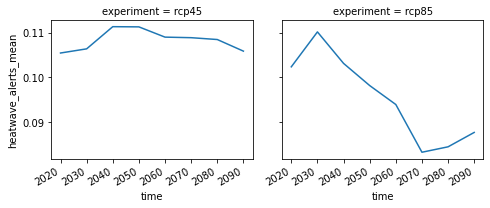

In [0]:
fut_ss_3.heatwave_alerts_mean.where(fut_ss_3.geoname=='Madrid', drop=True).plot(col='experiment')

In [0]:
fut_ss_4 = get_cached_remote_zarr(group='future-longterm-monthly-zs-nuts-level-4', root = "copernicus-climate/spain-zonal-stats.zarr")
fut_ss_4 = xr.merge([fut_ss_4, gda.where(gda.gid.isin(fut_ss_4.gid), drop=True)])
print(fut_ss_4.geoname.sortby('geoname').values.tolist())
fut_ss_4

['Ababuj', 'Abades', 'Abadiño', 'Abadía', 'Abadín', 'Abajas', 'Abaltzisketa', 'Abanilla', 'Abanto', 'Abanto Y Ciérvana-Abanto Zierbena', 'Abarca De Campos', 'Abarán', 'Abaurregaina / Abaurrea Alta', 'Abaurrepea / Abaurrea Baja', 'Abegondo', 'Abejar', 'Abejuela', 'Abella De La Conca', 'Abengibre', 'Abenójar', 'Aberin', 'Abertura', 'Abezames', 'Abia De La Obispalía', 'Abia De Las Torres', 'Abiego', 'Abizanda', 'Abla', 'Ablanque', 'Ablitas', 'Abrera', 'Abrucena', 'Abusejo', 'Abáigar', 'Abánades', 'Abárzuza / Abartzuza', 'Acebeda, La', 'Acebedo', 'Acebo', 'Acebrón, El', 'Acedera', 'Acehúche', 'Aceituna', 'Acered', 'Aceuchal', 'Adahuesca', 'Adalia', 'Adamuz', 'Adanero', 'Ademuz', 'Adiós', 'Adobes', 'Ador', 'Adra', 'Adrada De Haza', 'Adrada De Pirón', 'Adrada, La', 'Adradas', 'Adrados', 'Aduna', 'Agallas', 'Agolada', 'Agoncillo', 'Agost', 'Agramunt', 'Agres', 'Agrón', 'Aguadulce', 'Aguarón', 'Aguas Cándidas', 'Aguasal', 'Aguatón', 'Aguaviva', 'Agudo', 'Aguilafuente', 'Aguilar De Bureba', 'Ag

<xarray.Dataset>
Dimensions:                 (experiment: 2, gid: 8012, time: 8)
Coordinates:
  * experiment              (experiment) <U5 'rcp45' 'rcp85'
  * gid                     (gid) <U8 'ES_01001' 'ES_01002' ... 'ES_50903'
  * time                    (time) datetime64[ns] 2020-01-01 ... 2090-01-01
    admin_level             (gid) int64 dask.array<chunksize=(8012,), meta=np.ndarray>
    geoname                 (gid) object dask.array<chunksize=(1524,), meta=np.ndarray>
    iso3                    (gid) object dask.array<chunksize=(1524,), meta=np.ndarray>
Data variables:
    coldsnap_alarms_mean    (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    coldsnap_alarms_std     (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    coldsnap_alerts_mean    (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    coldsnap_alerts_std     (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    coldsnap_warnings_mean  (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    coldsnap_warnings_std   (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    heatwave_alarms_mean    (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    heatwave_alarms_std     (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    heatwave_alerts_mean    (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    heatwave_alerts_std     (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    heatwave_warnings_mean  (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    heatwave_warnings_std   (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    tasmax_mean             (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    tasmax_std              (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    tasmin_mean             (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    tasmin_std              (experiment, gid, time) float32 dask.array<chunksize=(1, 100, 8), meta=np.ndarray>
    geometry                (gid) object dask.array<chunksize=(1524,), meta=np.ndarray>

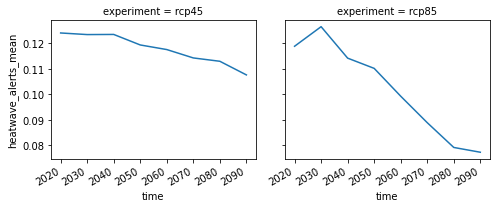

In [0]:
fut_ss_4.heatwave_alerts_mean.where(fut_ss_4.geoname=='Chueca', drop=True).plot(col='experiment')

## Make summaries per GID per time-interval

### Historical

In [0]:
import numpy as np

def make_summary_his(ds):
  # rechunk to reduce memory
  ds = ds.chunk({'gid':100})
  
  # define variables
  max_vars = ['tasmax_mean', 'petmax_mean']
  max_vars_names = ['max_tasmax', 'max_petmax']
  min_vars = ['tasmin_mean', 'petmin_mean']
  min_vars_names = ['min_tasmin', 'min_petmin']
  tot_vars = ['heatwave_alerts_mean', 'heatwave_alarms_mean', 'heatwave_warnings_mean',
              'coldsnap_alerts_mean', 'coldsnap_alarms_mean', 'coldsnap_warnings_mean',
              'heatstress_extreme_mean', 'heatstress_strong_mean', 'heatstress_moderate_mean',
              'coldstress_extreme_mean', 'coldstress_strong_mean', 'coldstress_moderate_mean']
  tot_vars_names = ['total_' + s.split('_mean')[0] for s in tot_vars]             
  
  # Calculate summaries
  #weights = ds.time.dt.daysinmonth
  # maximum
  ds_max = ds[max_vars].max('time', skipna=True).astype('float32').rename_vars(dict(zip(max_vars, max_vars_names))) 
  
  for var, max_var in zip(max_vars, max_vars_names):
    #print(var)
    #print(max_var)
    list_max_date = list()
    for gid in ds.gid.values.tolist():
      #print(gid)
      max_value = ds_max.sel(gid=gid)[max_var].values
      #print(max_value)
      if np.isnan(max_value):
        max_date = np.nan
      else:
        max_date = ds[var].sel(gid=gid).where(ds.sel(gid=gid)[var] == max_value, drop=True).time.values[0]
        #print(max_date)
      list_max_date.append(max_date)
      
    #print(list_max_date)
    ds_max[f"date_{max_var}"] = xr.DataArray(data=list_max_date, coords={'gid':ds.gid.values.tolist()}, dims='gid') 

  # minimum
  ds_min = ds[min_vars].min('time', skipna=True).astype('float32').rename_vars(dict(zip(min_vars, min_vars_names)))
  
  for var, min_var in zip(min_vars, min_vars_names):
    #print(var)
    #print(min_var)
    list_min_date = list()
    for gid in ds.gid.values.tolist():
      #print(gid)
      min_value = ds_min.sel(gid=gid)[min_var].values
      #print(max_value)
      if np.isnan(min_value):
        min_date = np.nan
      else:
        min_date = ds[var].sel(gid=gid).where(ds.sel(gid=gid)[var] == min_value, drop=True).time.values[0]
        #print(min_date)
      list_min_date.append(min_date)    
    
    #print(list_min_date)
    ds_min[f"date_{min_var}"] = xr.DataArray(data=list_min_date, coords={'gid':ds.gid.values.tolist()}, dims='gid')
  
  # total
  ds_tot = ds[tot_vars].sum('time').astype('float32').rename_vars(dict(zip(tot_vars, tot_vars_names)))

  # convert some units
  ds_max['max_tasmax'] = ds_max['max_tasmax'] - 272.15
  ds_min['min_tasmin'] = ds_min['min_tasmin'] - 272.15

  out = xr.merge([ds_max, ds_min, ds_tot, ds.geometry])
  return out
  

In [44]:
rmv_remote_zarr(group = "historical-total-zs-nuts-level-234", root = "copernicus-climate/spain-zonal-stats.zarr", show_tree=False)

Removing copernicus-climate/spain-zonal-stats.zarr/historical-total-zs-nuts-level-234


In [45]:
%%time
import warnings
warnings.filterwarnings("ignore")

# Create summaries per gid
his_ds = make_summary_his(xr.merge([his_ss_2, his_ss_3, his_ss_4]))
print("Writing to Zarr...\n")
write_to_remote_zarr(his_ds, group='historical-total-zs-nuts-level-234', root='copernicus-climate/spain-zonal-stats.zarr')

Writing to Zarr...

Starting to write to Zarr...

GCS store is setup

Writing to store...

Finished writing

copernicus-climate/spain-zonal-stats.zarr is consoldiated? True

/
 ├── future-longterm-monthly-zs-nuts-level-2
 │   ├── coldsnap_alerts_mean (2, 18, 8) float32
 │   ├── coldsnap_alerts_std (2, 18, 8) float32
 │   ├── experiment (2,) <U5
 │   ├── gid (18,) <U4
 │   ├── heatwave_alarms_mean (2, 18, 8) float32
 │   ├── heatwave_alarms_std (2, 18, 8) float32
 │   ├── heatwave_alerts_mean (2, 18, 8) float32
 │   ├── heatwave_alerts_std (2, 18, 8) float32
 │   ├── heatwave_warnings_mean (2, 18, 8) float32
 │   ├── heatwave_warnings_std (2, 18, 8) float32
 │   ├── tasmax_mean (2, 18, 8) float32
 │   ├── tasmax_std (2, 18, 8) float32
 │   ├── tasmin_mean (2, 18, 8) float32
 │   ├── tasmin_std (2, 18, 8) float32
 │   └── time (8,) int64
 ├── future-longterm-monthly-zs-nuts-level-3
 │   ├── coldsnap_alarms_mean (2, 52, 8) float32
 │   ├── coldsnap_alarms_std (2, 52, 8) float32
 │   ├── c

In [46]:
import warnings
warnings.filterwarnings("ignore")

# Create summaries per gid
his_gdf = to_geopandas(his_ds)
his_gdf.head()

gid  ...                                           geometry
0   ES11  ...  MULTIPOLYGON (((-7.69091 43.74958, -7.68778 43...
1  ES111  ...  MULTIPOLYGON (((-7.69091 43.74958, -7.68778 43...
2  ES112  ...  MULTIPOLYGON (((-7.63098 43.74713, -7.63068 43...
3  ES113  ...  MULTIPOLYGON (((-7.93071 42.57857, -7.91255 42...
4  ES114  ...  MULTIPOLYGON (((-8.16412 42.85221, -8.15068 42...

[5 rows x 25 columns]

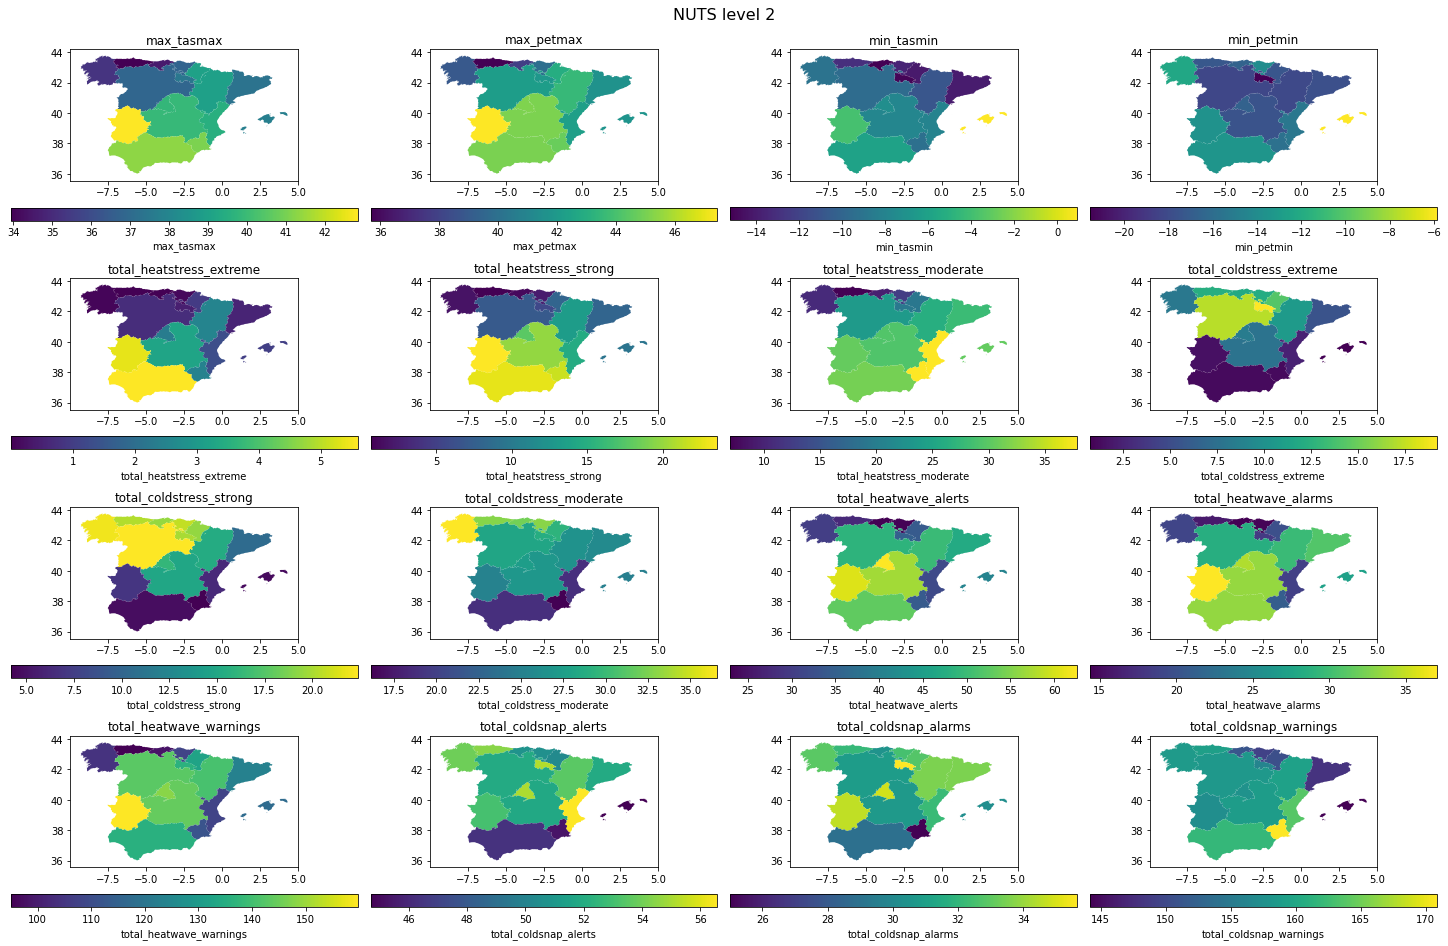

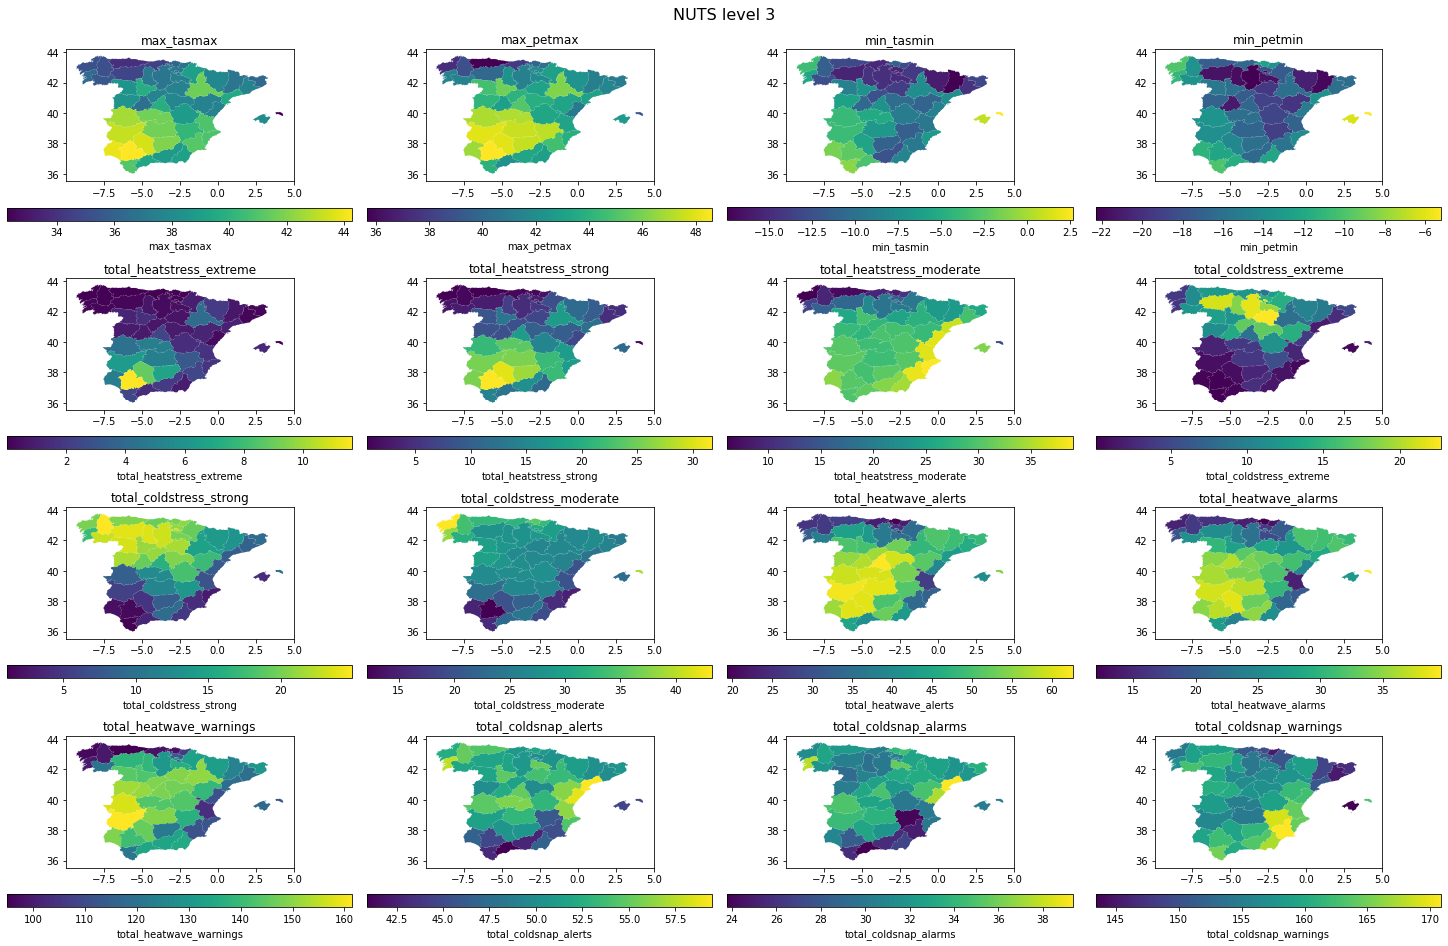

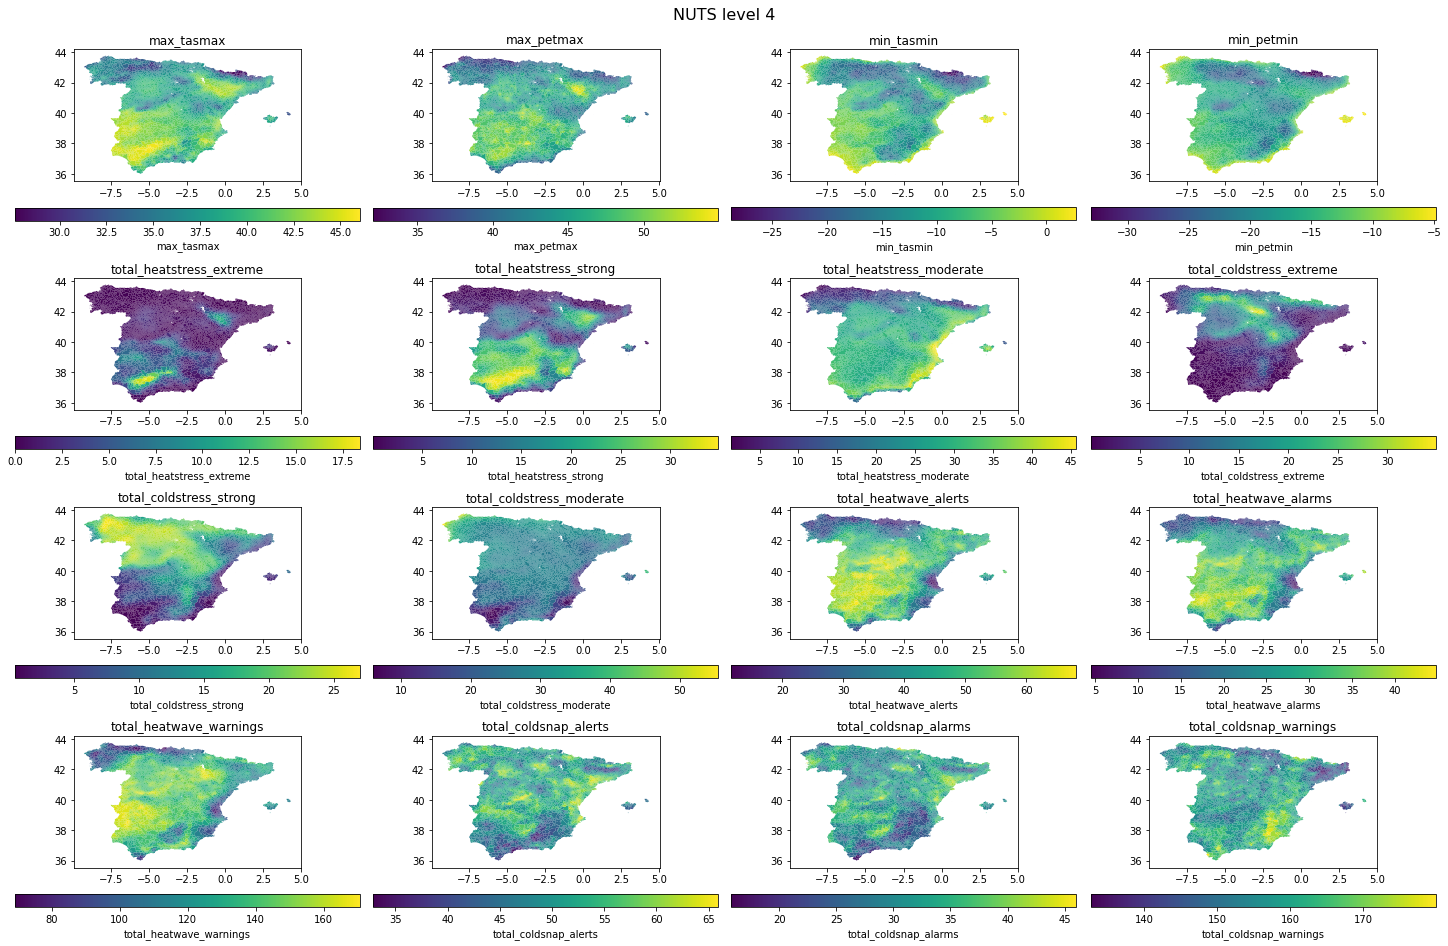

In [47]:
# plot them
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

columns = ['max_tasmax', 'max_petmax', 'min_tasmin', 'min_petmin',
         'total_heatstress_extreme', 'total_heatstress_strong', 'total_heatstress_moderate',
         'total_coldstress_extreme', 'total_coldstress_strong', 'total_coldstress_moderate',
         'total_heatwave_alerts', 'total_heatwave_alarms', 'total_heatwave_warnings',
         'total_coldsnap_alerts', 'total_coldsnap_alarms', 'total_coldsnap_warnings']

admin_levels = [2,3,4]

for l in admin_levels:
  plot_multi_geopandas(his_gdf, columns, fig_title = f"NUTS level {l}", sel=his_gdf.admin_level == l, cols=4, figsize=(20,15))
  print("\n")

### Seasonal

In [0]:
import numpy as np

def make_summary_seas(ds):
  # rechunk to reduce memory
  ds = ds.chunk({'gid':100})
  
  # define variables
  max_vars = ['tasmax_mean']
  max_vars_names = ['max_tasmax']
  min_vars = ['tasmin_mean']
  min_vars_names = ['min_tasmin']
  tot_vars = ['tasmax_std', 'tasmin_std',
              'heatwave_alerts_mean', 'heatwave_alarms_mean', 'heatwave_warnings_mean',
              'coldsnap_alerts_mean', 'coldsnap_alarms_mean', 'coldsnap_warnings_mean',
              'heatwave_alerts_std', 'heatwave_alarms_std', 'heatwave_warnings_std',
              'coldsnap_alerts_std', 'coldsnap_alarms_std', 'coldsnap_warnings_std']
  tot_vars_names = ['total_' + s.split('_mean')[0] for s in tot_vars]             
  
  # Calculate summaries
  #weights = ds.time.dt.daysinmonth
  # maximum
  ds_max = ds[max_vars].max('time', skipna=True).astype('float32').rename_vars(dict(zip(max_vars, max_vars_names))) 
  
  for var, max_var in zip(max_vars, max_vars_names):
    #print(var)
    #print(max_var)
    list_max_date = list()
    for gid in ds.gid.values.tolist():
      #print(gid)
      max_value = ds_max.sel(gid=gid)[max_var].values
      #print(max_value)
      if np.isnan(max_value):
        max_date = np.nan
      else:
        max_date = ds[var].sel(gid=gid).where(ds.sel(gid=gid)[var] == max_value, drop=True).time.values[0]
        #print(max_date)
      list_max_date.append(max_date)
      
    #print(list_max_date)
    ds_max[f"date_{max_var}"] = xr.DataArray(data=list_max_date, coords={'gid':ds.gid.values.tolist()}, dims='gid') 

  # minimum
  ds_min = ds[min_vars].min('time', skipna=True).astype('float32').rename_vars(dict(zip(min_vars, min_vars_names)))
  
  for var, min_var in zip(min_vars, min_vars_names):
    #print(var)
    #print(min_var)
    list_min_date = list()
    for gid in ds.gid.values.tolist():
      #print(gid)
      min_value = ds_min.sel(gid=gid)[min_var].values
      #print(max_value)
      if np.isnan(min_value):
        min_date = np.nan
      else:
        min_date = ds[var].sel(gid=gid).where(ds.sel(gid=gid)[var] == min_value, drop=True).time.values[0]
        #print(min_date)
      list_min_date.append(min_date)    
    
    #print(list_min_date)
    ds_min[f"date_{min_var}"] = xr.DataArray(data=list_min_date, coords={'gid':ds.gid.values.tolist()}, dims='gid')
  
  # total
  ds_tot = ds[tot_vars].sum('time').astype('float32').rename_vars(dict(zip(tot_vars, tot_vars_names)))

  # convert some units
  ds_max['max_tasmax'] = ds_max['max_tasmax'] - 272.15
  ds_min['min_tasmin'] = ds_min['min_tasmin'] - 272.15

  out = xr.merge([ds_max, ds_min, ds_tot, ds.geometry])
  return out
  

In [0]:
rmv_remote_zarr(group = "future-seasonal-total-zs-nuts-level-234", root = "copernicus-climate/spain-zonal-stats.zarr", show_tree=False)

Removing copernicus-climate/spain-zonal-stats.zarr/future-seasonal-total-zs-nuts-level-234


In [0]:
import warnings
warnings.filterwarnings("ignore")

# Create summaries per gid
seas_ds = make_summary_seas(xr.merge([seas_ss_2, seas_ss_3, seas_ss_4]))
print("Writing to Zarr...\n")
write_to_remote_zarr(seas_ds, group='future-seasonal-total-zs-nuts-level-234', root='copernicus-climate/spain-zonal-stats.zarr')

Writing to Zarr...

Starting to write to Zarr...

GCS store is setup

Writing to store...

Finished writing

copernicus-climate/spain-zonal-stats.zarr is consoldiated? True

/
 ├── future-longterm-monthly-zs-nuts-level-2
 │   ├── coldsnap_alarms_mean (2, 16, 8) float32
 │   ├── coldsnap_alarms_std (2, 16, 8) float32
 │   ├── coldsnap_alerts_mean (2, 16, 8) float32
 │   ├── coldsnap_alerts_std (2, 16, 8) float32
 │   ├── coldsnap_warnings_mean (2, 16, 8) float32
 │   ├── coldsnap_warnings_std (2, 16, 8) float32
 │   ├── experiment (2,) <U5
 │   ├── gid (16,) <U4
 │   ├── heatwave_alarms_mean (2, 16, 8) float32
 │   ├── heatwave_alarms_std (2, 16, 8) float32
 │   ├── heatwave_alerts_mean (2, 16, 8) float32
 │   ├── heatwave_alerts_std (2, 16, 8) float32
 │   ├── heatwave_warnings_mean (2, 16, 8) float32
 │   ├── heatwave_warnings_std (2, 16, 8) float32
 │   ├── tasmax_mean (2, 16, 8) float32
 │   ├── tasmax_std (2, 16, 8) float32
 │   ├── tasmin_mean (2, 16, 8) float32
 │   ├── tasmin_st

In [0]:
import warnings
warnings.filterwarnings("ignore")

# make geopandas df
seas_gdf = to_geopandas(seas_ds)
seas_gdf.head()

gid  ...                                           geometry
0   ES11  ...  MULTIPOLYGON (((-7.69091 43.74958, -7.68778 43...
1  ES111  ...  MULTIPOLYGON (((-7.69091 43.74958, -7.68778 43...
2  ES112  ...  MULTIPOLYGON (((-7.63098 43.74713, -7.63068 43...
3  ES113  ...  MULTIPOLYGON (((-7.93071 42.57857, -7.91255 42...
4  ES114  ...  MULTIPOLYGON (((-8.16412 42.85221, -8.15068 42...

[5 rows x 23 columns]

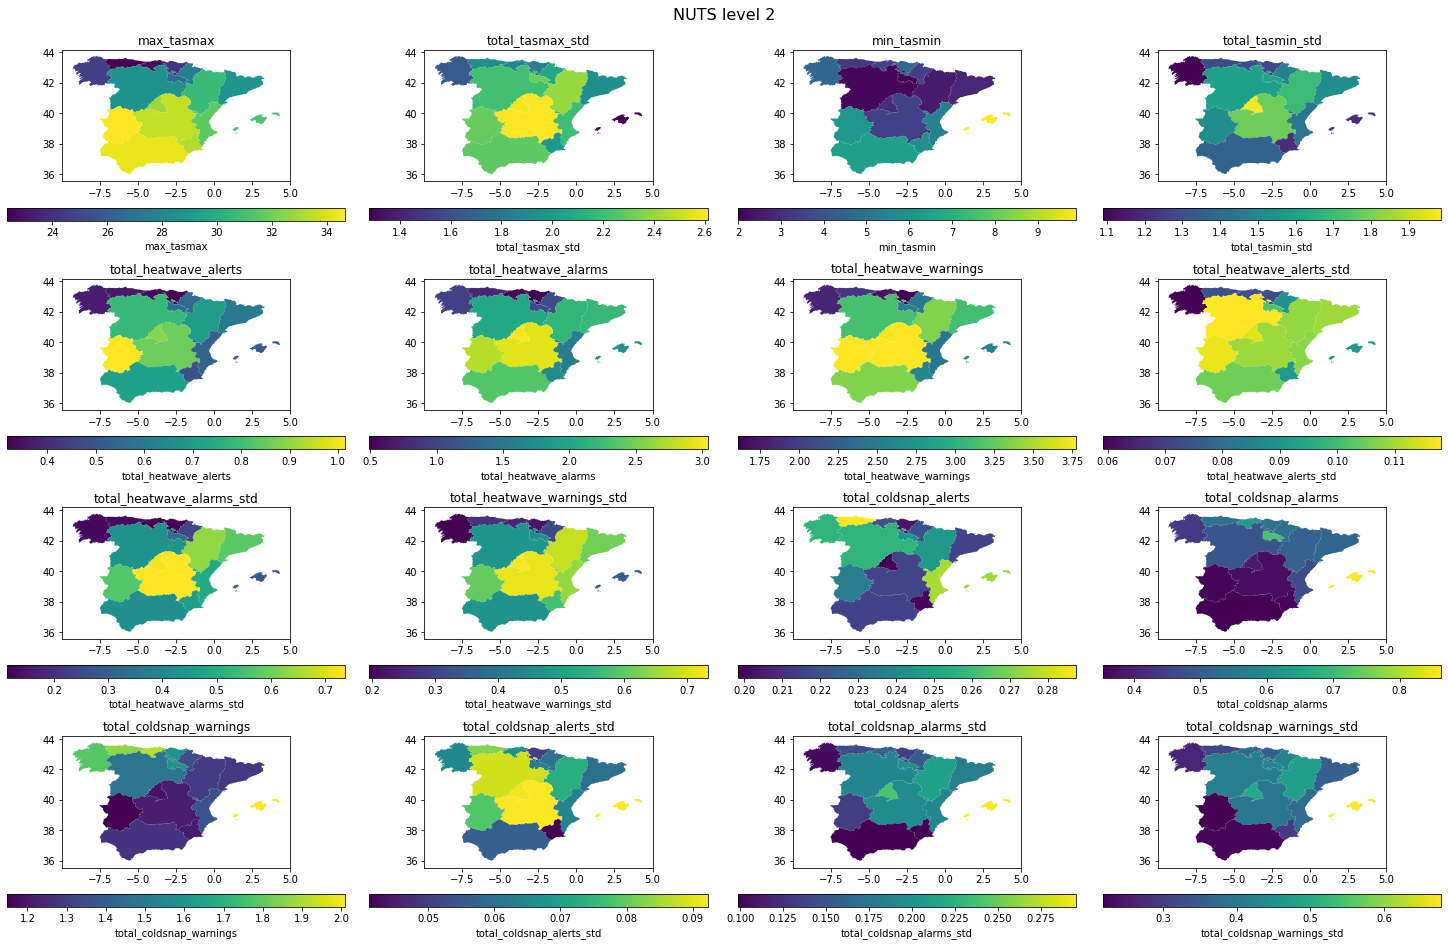

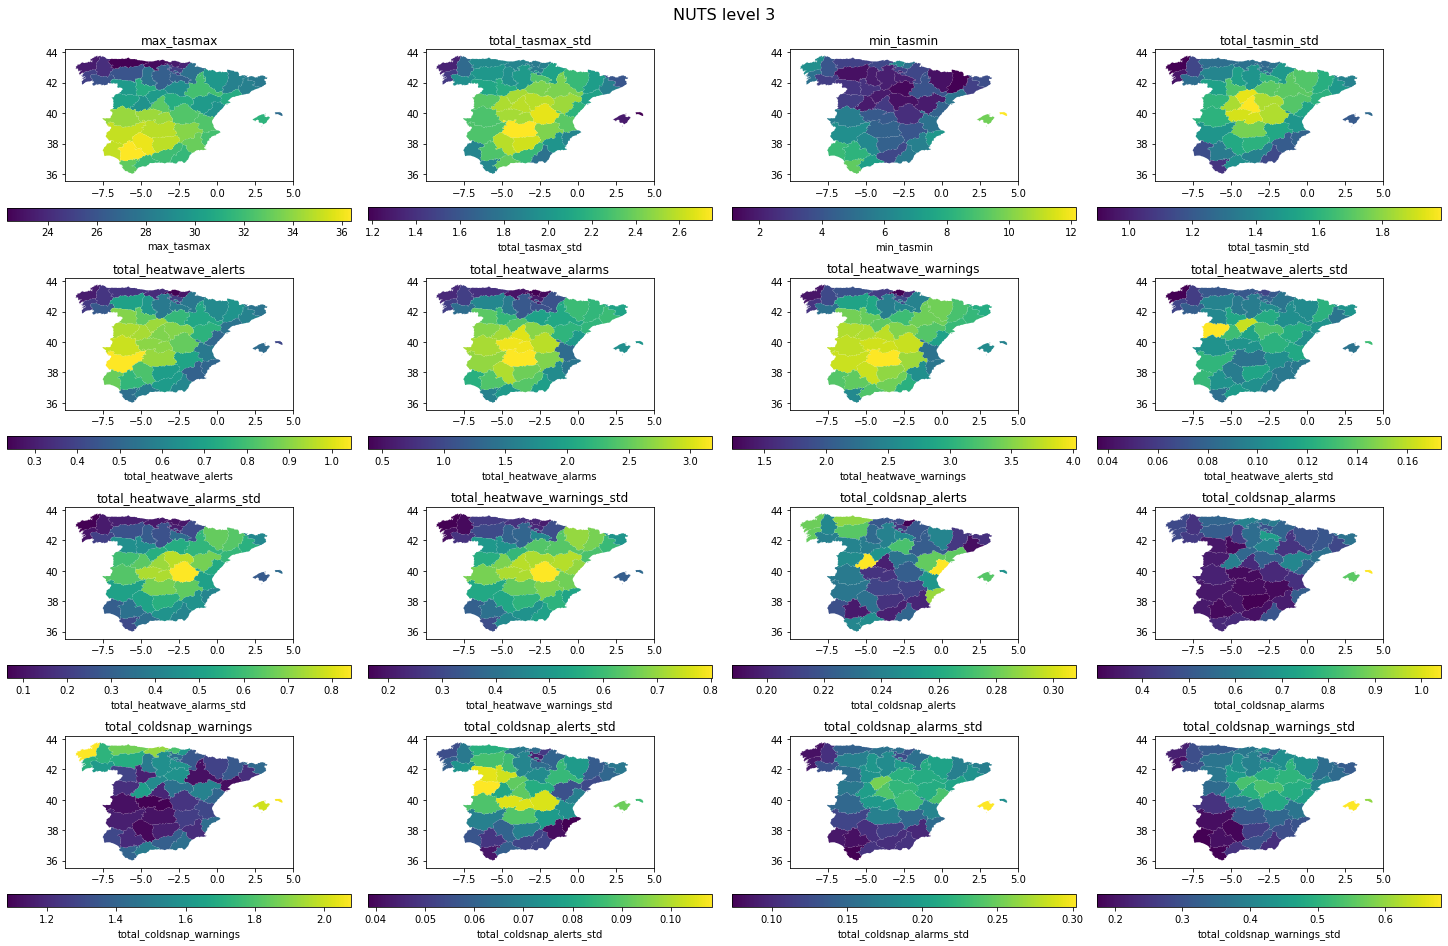

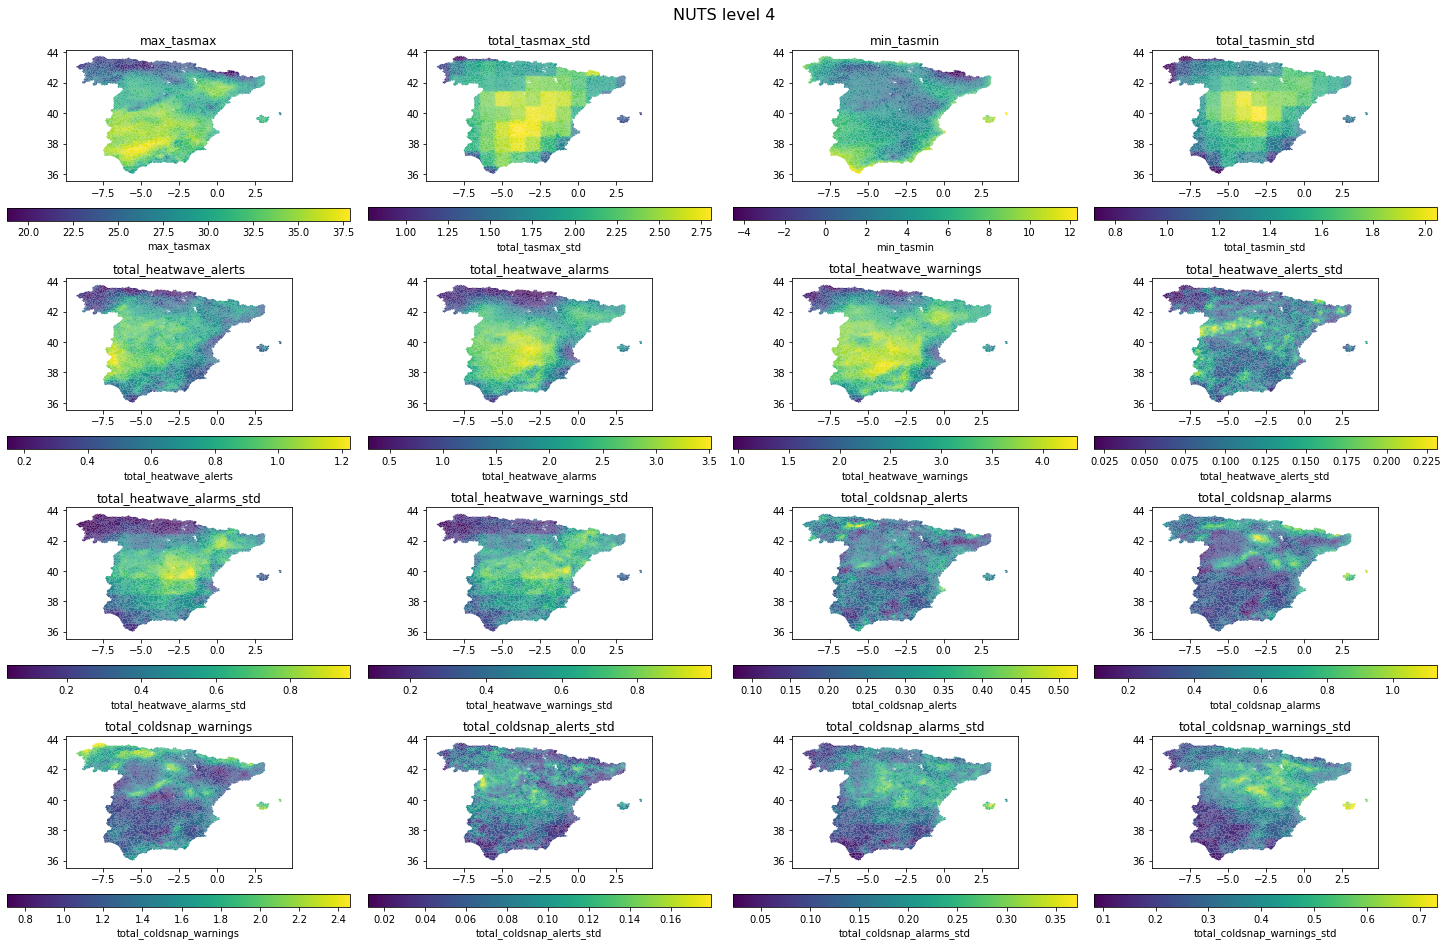

In [0]:
# plot them
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

columns = ['max_tasmax', 'total_tasmax_std', 'min_tasmin', 'total_tasmin_std',
         'total_heatwave_alerts', 'total_heatwave_alarms', 'total_heatwave_warnings',
         'total_heatwave_alerts_std', 'total_heatwave_alarms_std', 'total_heatwave_warnings_std',
         'total_coldsnap_alerts', 'total_coldsnap_alarms', 'total_coldsnap_warnings',
         'total_coldsnap_alerts_std', 'total_coldsnap_alarms_std', 'total_coldsnap_warnings_std']

admin_levels = [2,3,4]

for l in admin_levels:
  plot_multi_geopandas(seas_gdf, columns, fig_title = f"NUTS level {l}", sel=seas_gdf.admin_level == l, cols=4, figsize=(20,15))
  print("\n")

### Longterm

In [0]:
import numpy as np

def make_summary_fut(ds):
  # rechunk to reduce memory
  ds = ds.chunk({'gid':100})
  
  # define variables
  max_vars = ['tasmax_mean']
  max_vars_names = ['max_tasmax']
  min_vars = ['tasmin_mean']
  min_vars_names = ['min_tasmin']
  tot_vars = ['tasmax_std', 'tasmin_std',
              'heatwave_alerts_mean', 'heatwave_alarms_mean', 'heatwave_warnings_mean',
              'coldsnap_alerts_mean', 'coldsnap_alarms_mean', 'coldsnap_warnings_mean',
              'heatwave_alerts_std', 'heatwave_alarms_std', 'heatwave_warnings_std',
              'coldsnap_alerts_std', 'coldsnap_alarms_std', 'coldsnap_warnings_std']
  tot_vars_names = ['total_' + s.split('_mean')[0] for s in tot_vars]             
  
  # Calculate summaries
  #weights = ds.time.dt.daysinmonth
  # maximum
  ds_max = ds[max_vars].max('time', skipna=True).astype('float32').rename_vars(dict(zip(max_vars, max_vars_names))) 
  
  for var, max_var in zip(max_vars, max_vars_names):
    #print(var)
    #print(max_var)
    list_max_date = list()
    for gid in ds.gid.values.tolist():
      #print(gid)
      max_value = ds_max.sel(gid=gid)[max_var].values
      #print(max_value)
      if np.isnan(max_value):
        max_date = np.nan
      else:
        max_date = ds[var].sel(gid=gid).where(ds.sel(gid=gid)[var] == max_value, drop=True).time.values[0]
        #print(max_date)
      list_max_date.append(max_date)
      
    #print(list_max_date)
    ds_max[f"date_{max_var}"] = xr.DataArray(data=list_max_date, coords={'gid':ds.gid.values.tolist()}, dims='gid') 

  # minimum
  ds_min = ds[min_vars].min('time', skipna=True).astype('float32').rename_vars(dict(zip(min_vars, min_vars_names)))
  
  for var, min_var in zip(min_vars, min_vars_names):
    #print(var)
    #print(min_var)
    list_min_date = list()
    for gid in ds.gid.values.tolist():
      #print(gid)
      min_value = ds_min.sel(gid=gid)[min_var].values
      #print(max_value)
      if np.isnan(min_value):
        min_date = np.nan
      else:
        min_date = ds[var].sel(gid=gid).where(ds.sel(gid=gid)[var] == min_value, drop=True).time.values[0]
        #print(min_date)
      list_min_date.append(min_date)    
    
    #print(list_min_date)
    ds_min[f"date_{min_var}"] = xr.DataArray(data=list_min_date, coords={'gid':ds.gid.values.tolist()}, dims='gid')
  
  # total
  ds_tot = ds[tot_vars].sum('time').astype('float32').rename_vars(dict(zip(tot_vars, tot_vars_names)))

  # convert some units
  ds_max['max_tasmax'] = ds_max['max_tasmax'] - 272.15
  ds_min['min_tasmin'] = ds_min['min_tasmin'] - 272.15

  out = xr.merge([ds_max, ds_min, ds_tot, ds.geometry])
  return out
  

In [0]:
rmv_remote_zarr(group = "future-longterm-total-zs-nuts-level-234", root = "copernicus-climate/spain-zonal-stats.zarr", show_tree=False)

Removing copernicus-climate/spain-zonal-stats.zarr/future-longterm-total-zs-nuts-level-234


In [0]:
import warnings
warnings.filterwarnings("ignore")

# Create summaries per gid
fut_ds = xr.concat([make_summary_fut(xr.merge([fut_ss_2.sel(experiment=e), fut_ss_3.sel(experiment=e), fut_ss_4.sel(experiment=e)])) for e in ['rcp45', 'rcp85']], dim='experiment')
print("Writing to Zarr...\n")
write_to_remote_zarr(fut_ds, group='future-longterm-total-zs-nuts-level-234', root='copernicus-climate/spain-zonal-stats.zarr')
fut_ds

Writing to Zarr...

Starting to write to Zarr...

GCS store is setup

Writing to store...

Finished writing

copernicus-climate/spain-zonal-stats.zarr is consoldiated? True

/
 ├── future-longterm-monthly-zs-nuts-level-2
 │   ├── coldsnap_alarms_mean (2, 16, 8) float32
 │   ├── coldsnap_alarms_std (2, 16, 8) float32
 │   ├── coldsnap_alerts_mean (2, 16, 8) float32
 │   ├── coldsnap_alerts_std (2, 16, 8) float32
 │   ├── coldsnap_warnings_mean (2, 16, 8) float32
 │   ├── coldsnap_warnings_std (2, 16, 8) float32
 │   ├── experiment (2,) <U5
 │   ├── gid (16,) <U4
 │   ├── heatwave_alarms_mean (2, 16, 8) float32
 │   ├── heatwave_alarms_std (2, 16, 8) float32
 │   ├── heatwave_alerts_mean (2, 16, 8) float32
 │   ├── heatwave_alerts_std (2, 16, 8) float32
 │   ├── heatwave_warnings_mean (2, 16, 8) float32
 │   ├── heatwave_warnings_std (2, 16, 8) float32
 │   ├── tasmax_mean (2, 16, 8) float32
 │   ├── tasmax_std (2, 16, 8) float32
 │   ├── tasmin_mean (2, 16, 8) float32
 │   ├── tasmin_st

<xarray.Dataset>
Dimensions:                      (experiment: 2, gid: 8078)
Coordinates:
    geoname                      (gid) object dask.array<chunksize=(100,), meta=np.ndarray>
    iso3                         (gid) object dask.array<chunksize=(100,), meta=np.ndarray>
    admin_level                  (gid) float64 dask.array<chunksize=(100,), meta=np.ndarray>
  * gid                          (gid) <U8 'ES11' 'ES111' ... 'ES_50903'
  * experiment                   (experiment) object 'rcp45' 'rcp85'
Data variables:
    max_tasmax                   (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    date_max_tasmax              (experiment, gid) datetime64[ns] 2090-01-01 ... 2090-01-01
    min_tasmin                   (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    date_min_tasmin              (experiment, gid) datetime64[ns] 2020-01-01 ... 2020-01-01
    total_tasmax_std             (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_tasmin_std             (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_heatwave_alerts        (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_heatwave_alarms        (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_heatwave_warnings      (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_coldsnap_alerts        (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_coldsnap_alarms        (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_coldsnap_warnings      (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_heatwave_alerts_std    (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_heatwave_alarms_std    (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_heatwave_warnings_std  (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_coldsnap_alerts_std    (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_coldsnap_alarms_std    (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    total_coldsnap_warnings_std  (experiment, gid) float32 dask.array<chunksize=(1, 100), meta=np.ndarray>
    geometry                     (experiment, gid) object dask.array<chunksize=(1, 100), meta=np.ndarray>

In [0]:
import warnings
warnings.filterwarnings("ignore")

# Convert to geopandas
fut_gdf = to_geopandas(fut_ds)
fut_gdf.head()

experiment  ...                                           geometry
0      rcp45  ...  MULTIPOLYGON (((-7.69091 43.74958, -7.68778 43...
1      rcp45  ...  MULTIPOLYGON (((-7.69091 43.74958, -7.68778 43...
2      rcp45  ...  MULTIPOLYGON (((-7.63098 43.74713, -7.63068 43...
3      rcp45  ...  MULTIPOLYGON (((-7.93071 42.57857, -7.91255 42...
4      rcp45  ...  MULTIPOLYGON (((-8.16412 42.85221, -8.15068 42...

[5 rows x 24 columns]

rcp45


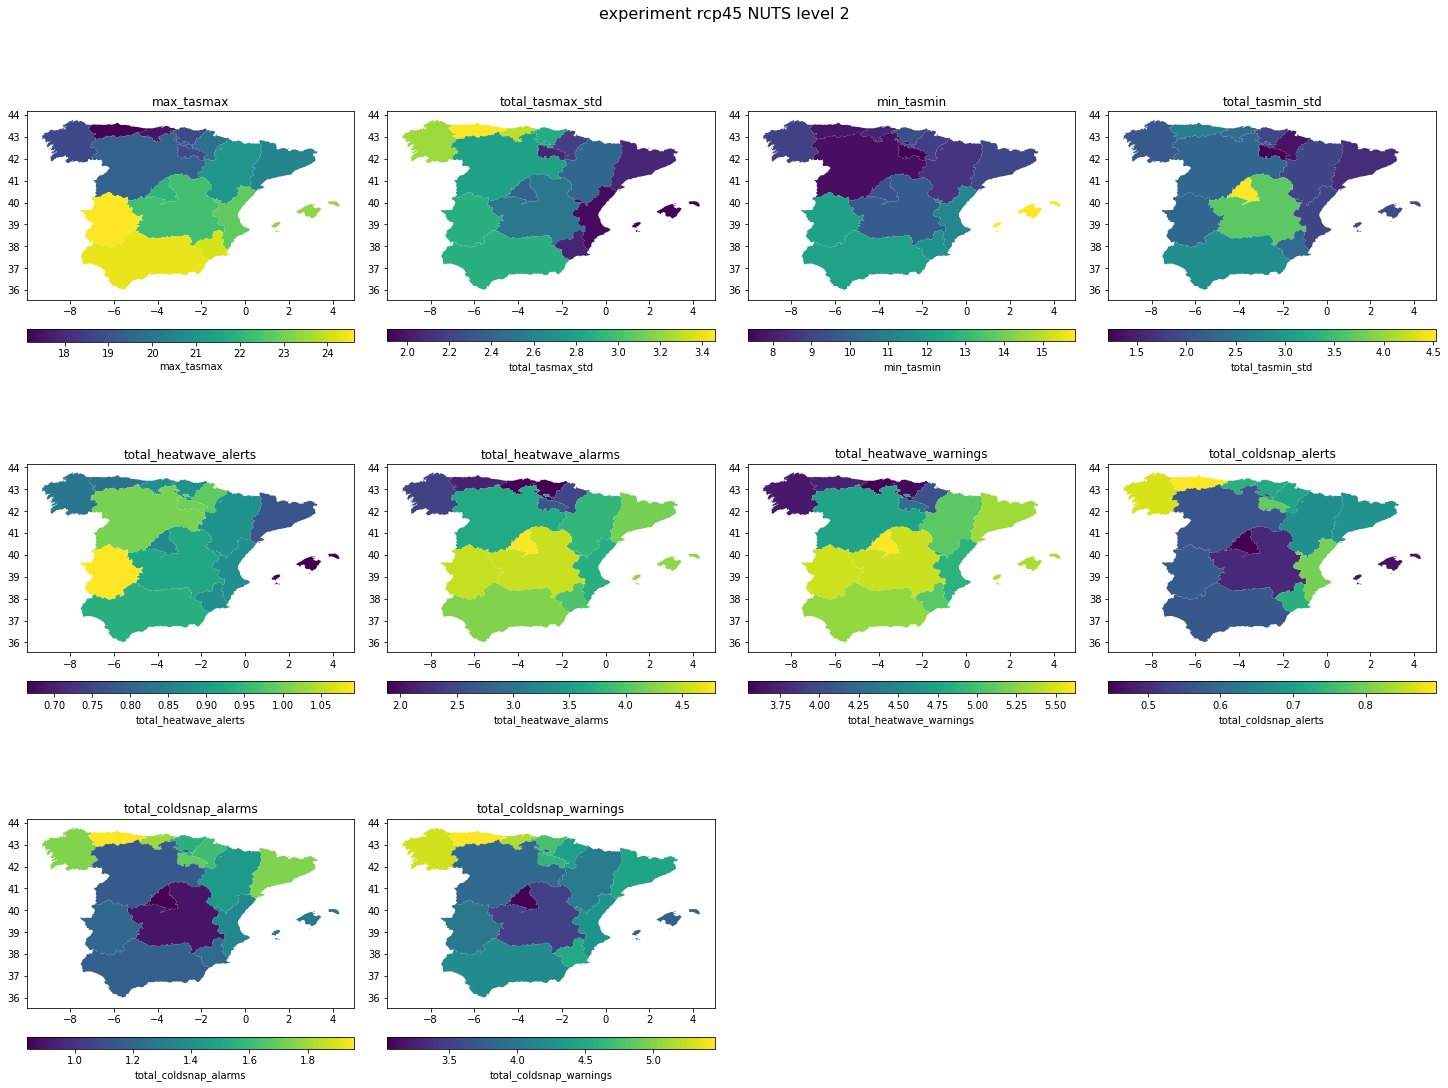



rcp85


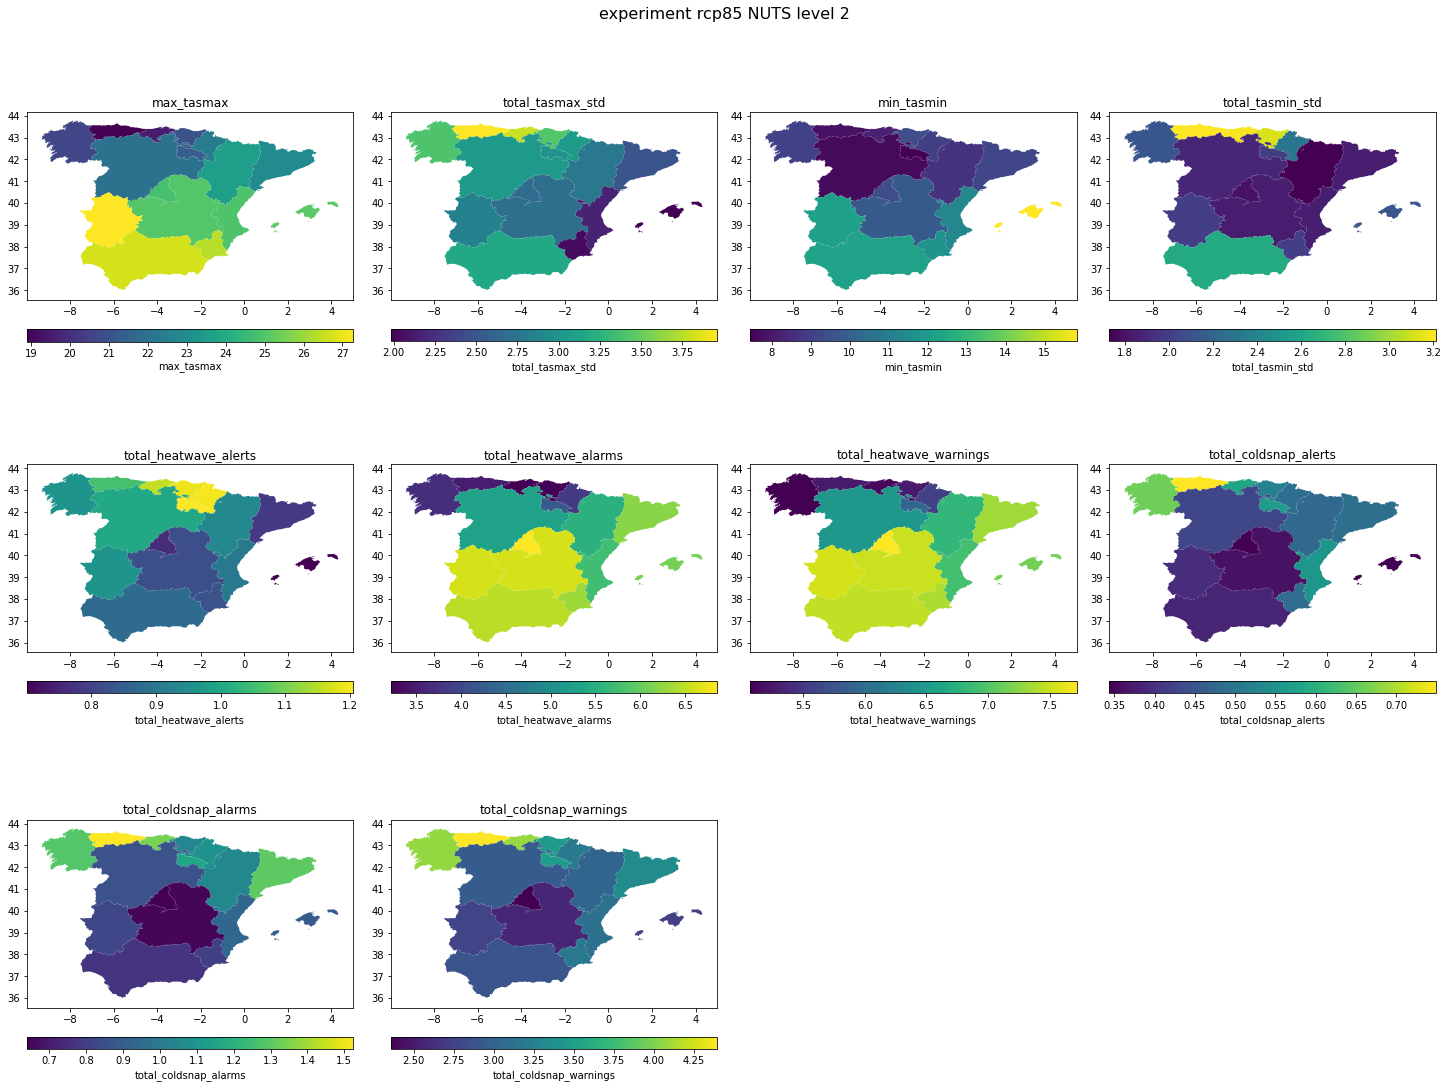



rcp45


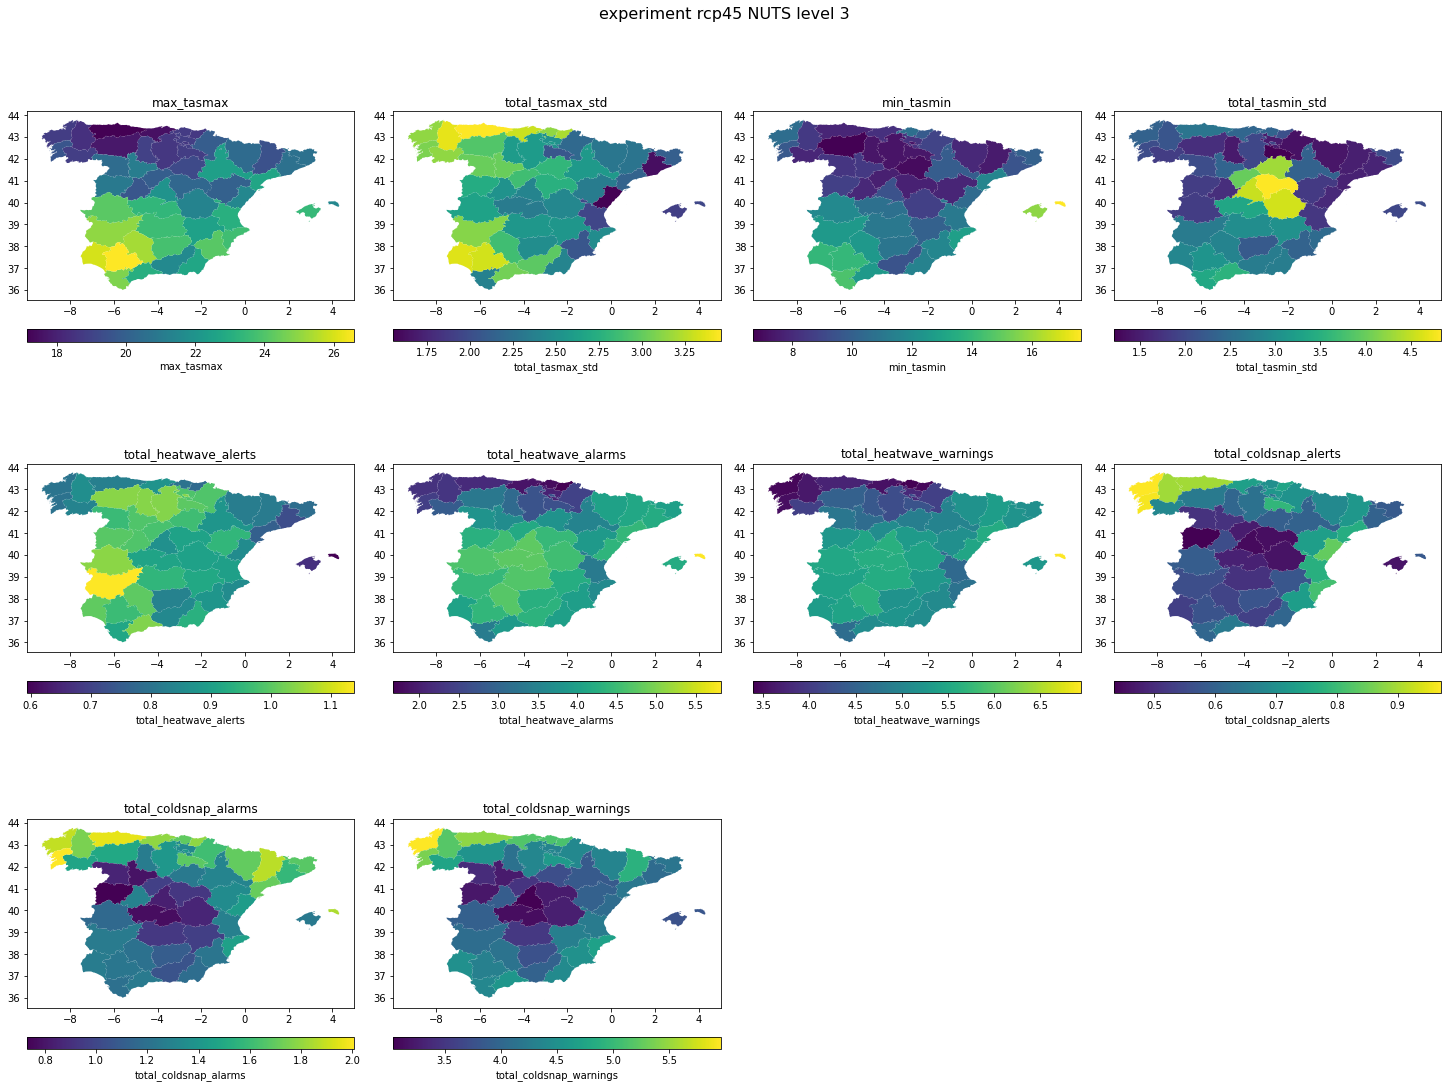



rcp85


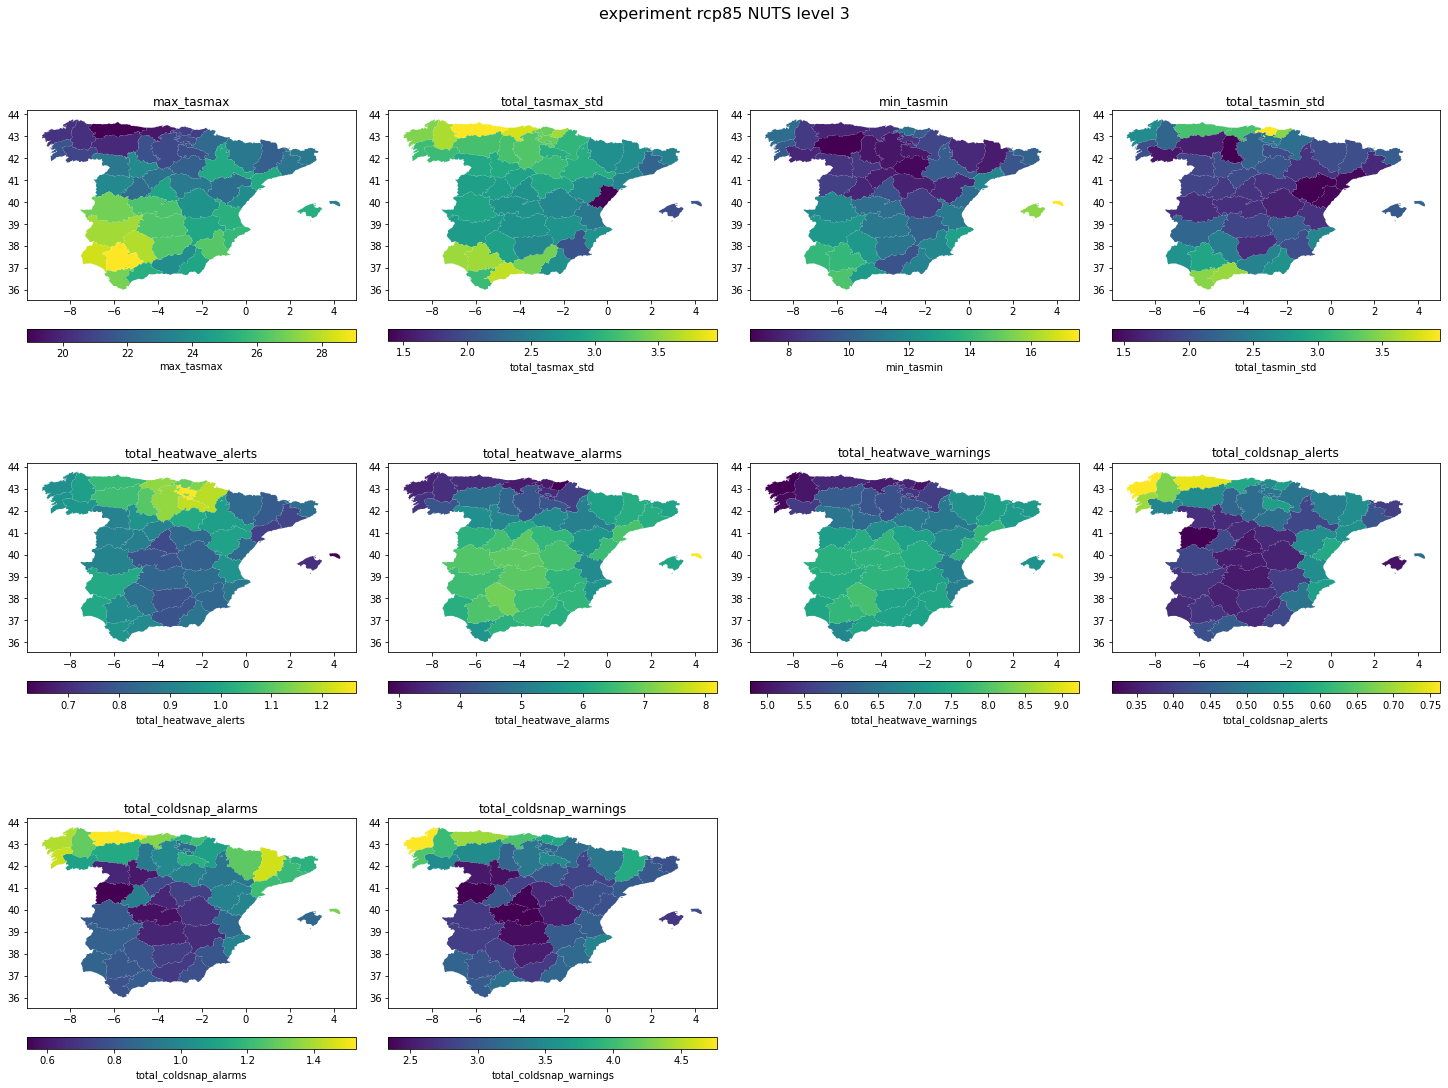



rcp45


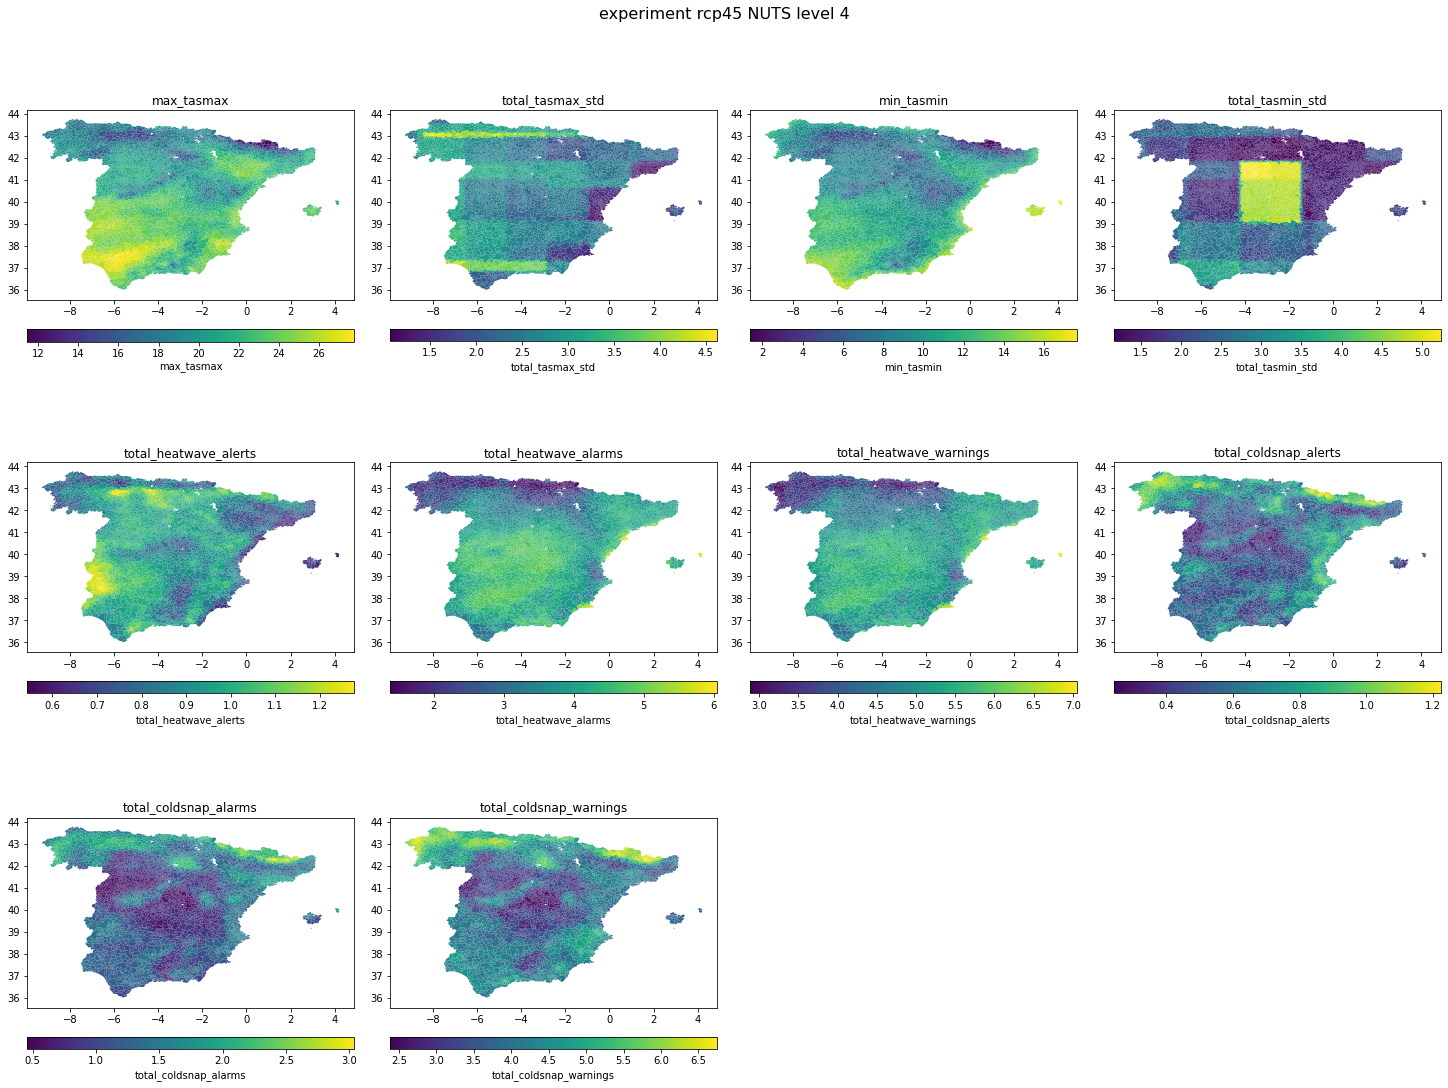



rcp85


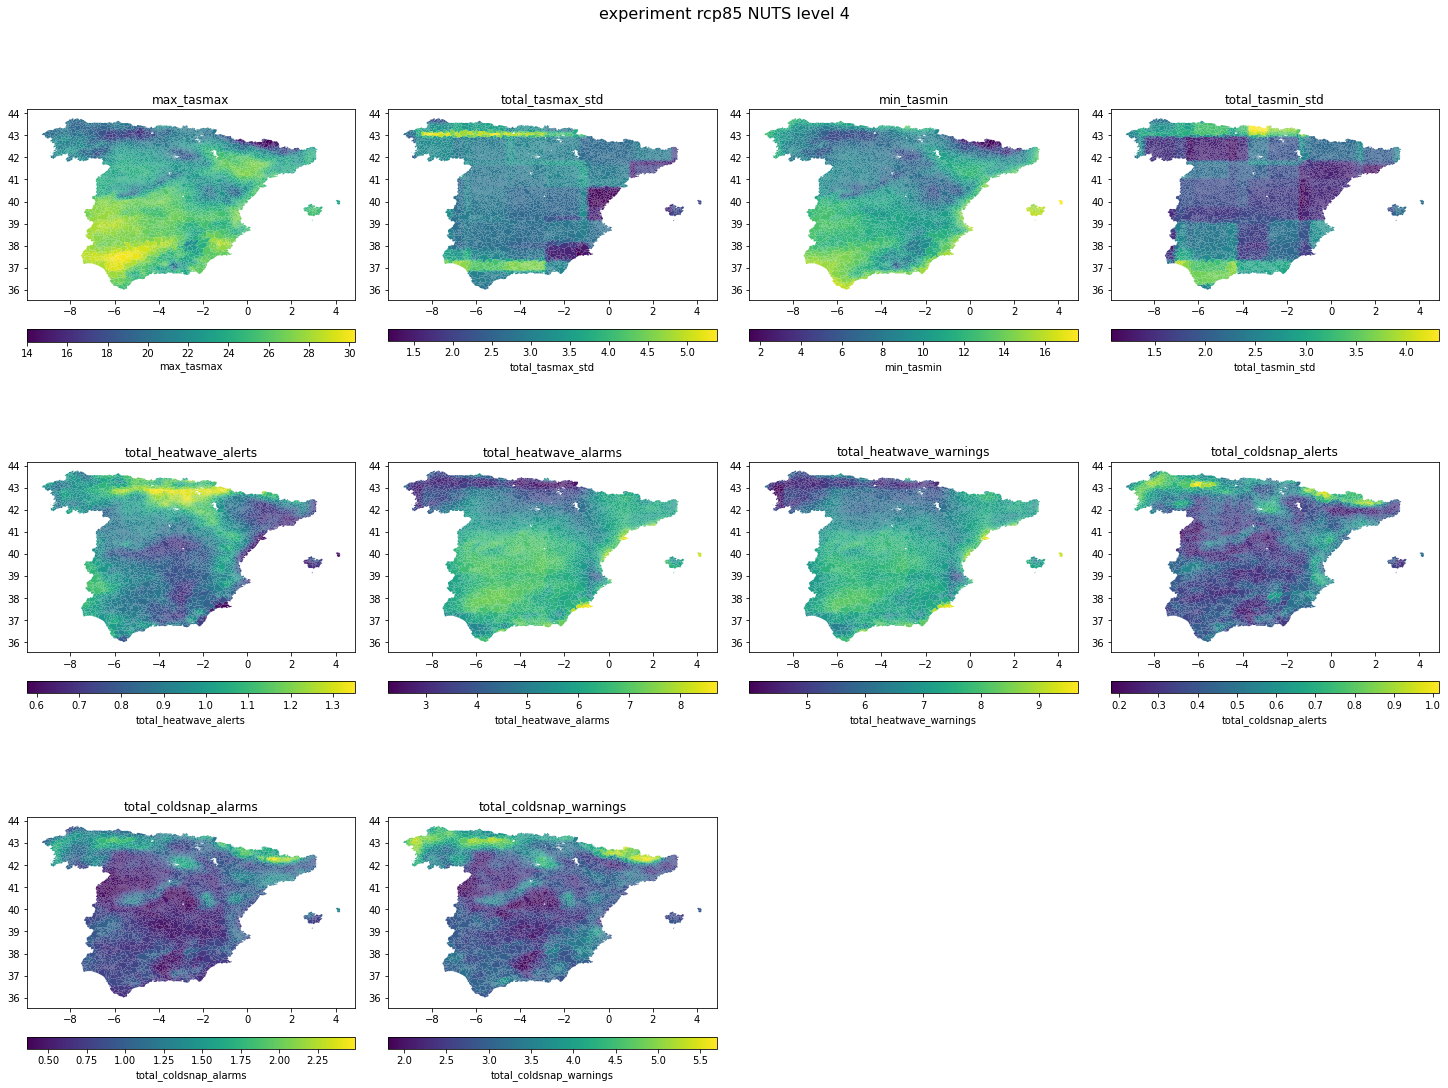

In [0]:
# plot them
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

columns = ['max_tasmax', 'total_tasmax_std', 'min_tasmin', 'total_tasmin_std',
         'total_heatwave_alerts', 'total_heatwave_alarms', 'total_heatwave_warnings',
         'total_coldsnap_alerts', 'total_coldsnap_alarms', 'total_coldsnap_warnings']

admin_levels = [2,3,4]
for l in admin_levels:
  for e in ['rcp45', 'rcp85']:
    print(e)
    plot_multi_geopandas(fut_gdf.loc[(fut_gdf.experiment == e)], columns, fig_title = f"experiment {e} NUTS level {l}", sel=fut_gdf.admin_level == l, cols=4, figsize=(20,15))
    print("\n")

### Set Zarr store to public 

In [0]:
%%time
# Make Zarr directories PUBLIC
set_acl_to_public(f"{gcs_prefix}/spain-zonal-stats.zarr")

gsutil -m acl -r ch -u AllUsers:R gs://copernicus-climate/spain-zonal-stats.zarr
Set acl(s) sucsessful
CPU times: user 56.4 ms, sys: 24.6 ms, total: 81 ms
Wall time: 1min 3s


### Write to GeoJSON

In [0]:
# Write to GCS
#%%time
#import gcsfs
#import json

# create store
#fs = gcsfs.GCSFileSystem(project=gc_project, token=f"/root/.{gc_creds}")

#with fs.open(f"{gcs_prefix}/zonal_stats/zonal-stats-totals_esp-nuts-level-2-3-4_historical_1981--2019.json", 'wb', encoding='utf-8') as f:
#  his_gdf.to_file(f, driver="GeoJSON")
#with fs.open(f"{gcs_prefix}/zonal_stats/zonal-stats-totals_esp-nuts-level-2-3-4_future-seasonal_20200201--20200701.json", 'w', encoding='utf-8') as f:
#  seas_gdf.to_file(f, driver="GeoJSON")
#with fs.open(f"{gcs_prefix}/zonal_stats/zonal-stats-totals_esp-nuts-level-2-3-4_future-longterm_2020--2090.json", 'w', encoding='utf-8') as f:
#  fut_gdf.to_file(f, driver="GeoJSON")
#print("Finished writing files")

In [0]:
# Write to GCS
%%time
mkdirs(['zonal-stats'])
try:
  his_gdf.to_file('zonal-stats/zonal-stats-totals_esp-nuts-level-2-3-4_historical_1981--2019.json', driver="GeoJSON")
except:
  pass
try:
  seas_gdf.to_file("zonal-stats/zonal-stats-totals_esp-nuts-level-2-3-4_future-seasonal_20200201--20200701.json", driver="GeoJSON")
except:
  pass
try:
  fut_gdf.to_file("zonal-stats/zonal-stats-totals_esp-nuts-level-2-3-4_future-longterm_2020--2090.json", driver="GeoJSON")
except:
  pass
copy_gcs(['zonal-stats/*'], [f"{gcs_prefix}/zonal_stats/"])
print("Finished writing files")

Processing: gsutil -m cp -r  zonal-stats/* gs://copernicus-climate/zonal_stats/
Task created
Finished copy
Finished writing files
CPU times: user 23 s, sys: 388 ms, total: 23.4 s
Wall time: 26.2 s


# End

In [0]:
# Total time
from datetime import datetime
end_time = datetime.now()
tot = end_time - start_time_setup
proc = end_time - start_time_processing
print(f"Total time {tot} of which processing was {proc}")

Total time 1:36:40.890665 of which processing was 1:36:09.998407
